# Harmonization Parameters Finder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Read Data

In [2]:
def read_sensor_data(file_prefix, num_sensors=15,api=False):
    
    if api:
        # file_prefix = 'tsi_v3_api/telemetry_outputs/Raw_Edited.csv'
        df = pd.read_csv(file_prefix)
        # Group by 'model' and create a dictionary of DataFrames
        model_dfs = {}
        sensor_dataframes = []
        for model, group in df.groupby('friendly_name'):
            model_dfs[model] = group

        rename_dict = {
                'PM1.0 (ug/m3)': 'PM 1.0',
                'PM2.5 (ug/m3)': 'PM 2.5',
                'PM4.0 (ug/m3)': 'PM 4.0',
                'PM10 (ug/m3)': 'PM 10',
                'PM0.5 NC (#/cm3)': 'NC 0.5',
                'PM1.0 NC (#/cm3)': 'NC 1.0',
                'PM2.5 NC (#/cm3)': 'NC 2.5',
                'PM4.0 NC (#/cm3)': 'NC 4.0',
                'PM10 NC (#/cm3)': 'NC 10',
                'Typical Particle Size (um)': 'Typical Particle Size',
                'Temperature (Celsius)': 'Temperature',
                'Relative Humidity (%)': 'Relative Humidity',
                'timestamp' : 'Timestamp'
        }
        # Access individual DataFrames
        for keys in model_dfs.keys():
            # print(f"DataFrame for Model {model}:")
            # print(model_df)
                
            model_dfs[keys] = model_dfs[keys].rename(columns=rename_dict)
            # print("\n")
            sensor_dataframes.append(model_dfs[keys])
        return sensor_dataframes
        
    else:
        sensor_dataframes = []
        for i in range(1, num_sensors + 1):
            filename = f'{file_prefix}{i:02d}.csv'
            sensor_df = pd.read_csv(filename)
            sensor_dataframes.append(sensor_df)
        return sensor_dataframes

# sensor_dataframes = read_sensor_data('data/Indoor')

# Getting Data from Darrens Code

In [ ]:
# https://stackoverflow.com/questions/75048986/way-to-temporarily-change-the-directory-in-python-to-execute-code-without-affect

import contextlib


@contextlib.contextmanager
def new_cd(x):
    d = os.getcwd()

    # This could raise an exception, but it's probably
    # best to let it propagate and let the caller
    # deal with it, since they requested x
    os.chdir(x)

    try:
        yield

    finally:
        # This could also raise an exception, but you *really*
        # aren't equipped to figure out what went wrong if the
        # old working directory can't be restored.
        os.chdir(d)

In [ ]:
from tsi_v3_api.get_all_raw_data import device_list, client_token, main, get_and_flatten_telemetry

work_dir = r'tsi_v3_api/'

# with os.chdir(work_dir):
with new_cd(work_dir):

    from tsi_v3_api.get_all_raw_data import device_list, client_token, main, get_and_flatten_telemetry
    secrets_PATH = r'account_auth_info/secrets.csv'
    main(secrets_PATH, days_duration=2)

In [ ]:
# # Add relavant details to secrets

# work_dir = r'tsi_v3_api/'
# os.chdir(work_dir)
# secrets_PATH = r'account_auth_info/secrets.csv'
# main(secrets_PATH,True)

In [ ]:
file_prefix = 'tsi_v3_api/telemetry_outputs/Raw_Edited.csv'
sensor_dataframes = read_sensor_data(file_prefix,api=True)

In [ ]:
sensor_dataframes[0].to_csv('tsi_v3_api/telemetry_outputs/test.csv')

In [14]:
def read_sensor_data(file_prefix, num_sensors=15):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'data/Jun29-Jul5/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

## Clean Data

In [15]:
# def create_units_dict(df):
#     units_dict = {}
#     for column in df.columns:
#         units_dict[column] = df.loc[0, column]
#     return units_dict

# units_dict = create_units_dict(sensor_dataframes[0])

units_dict = {'Timestamp': 'UTC',
 'Timestamp (Local)': 'UTC-05:00',
 'PM 1.0': 'ug/m3',
 'PM 2.5': 'ug/m3',
 'Applied PM 2.5 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 2.5 Custom Calibration Setting - Offset': None,
 'PM 4.0': 'ug/m3',
 'PM 10': 'ug/m3',
 'Applied PM 10 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 10 Custom Calibration Setting - Offset': None,
 'NC 0.5': '#/cm3',
 'NC 1.0': '#/cm3',
 'NC 2.5': '#/cm3',
 'NC 4.0': '#/cm3',
 'NC 10': '#/cm3',
 'PM Sensor Error Status': None,
 'CO2': 'ppm',
 'Applied CO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO2 Custom Calibration Setting - Offset': None,
 'CO2 Sensor Error Status': None,
 'CH2O': 'ppb',
 'Applied CH2O Custom Calibration Setting - Multiplication Factor': None,
 'Applied CH2O Custom Calibration Setting - Offset': None,
 'CH2O Sensor Error Status': None,
 'Barometric Pressure': 'inHg',
 'Applied Barometric Pressure Custom Calibration Setting - Offset': None,
 'Barometric Sensor Error Status': None,
 'CO': 'ppm',
 'Applied CO Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO Custom Calibration Setting - Offset': None,
 'CO Sensor Error Status': None,
 'SO2': 'ppb',
 'Applied SO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied SO2 Custom Calibration Setting - Offset': None,
 'SO2 Sensor Error Status': None,
 'O3': 'ppb',
 'Applied O3 Custom Calibration Setting - Multiplication Factor': None,
 'Applied O3 Custom Calibration Setting - Offset': None,
 'O3 Sensor Error Status': None,
 'NO2': 'ppb',
 'Applied NO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied NO2 Custom Calibration Setting - Offset': None,
 'NO2 Sensor Error Status': None,
 'VOC tVOC measurement': 'mg/m3',
 'Applied TVOC Custom Calibration Setting - Multiplication Factor': None,
 'Applied TVOC Custom Calibration Setting - Offset': None,
 'VOC Ethanol': 'ppb',
 'VOC Sensor Error Status': None,
 'Temperature': 'Fahrenheit',
 'Applied Temperature Custom Calibration Setting - Offset': 'Celsius',
 'Relative Humidity': '%',
 'Applied Relative Humidity Custom Calibration Setting - Offset': None,
 'Temperature/Humidity Sensor Error Status': None,
 'Device Status': None}

In [16]:
# Sensor names for mapping
sensor_names = ['sensor01', 'sensor02', 'sensor03', 'sensor04', 'sensor05', 
                'sensor06', 'sensor07', 'sensor08', 'sensor09', 'sensor10',
                'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15']
def clean_sensor_dataframes(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'CO2', 'Barometric Pressure', 'VOC tVOC measurement',
                       'VOC Ethanol', 'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    
    columns_not_present = list(set(numeric_columns) - set(sensor_dataframes[0].columns.to_list()))
    columns_present = [x for x in numeric_columns if x not in columns_not_present]

    print(f'Columns not present in the Dataframe: {columns_not_present}')

    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        set(columns_present) - set(sensor_dataframes[0].columns.to_list())
        
        sensor_df[columns_present] = sensor_df[columns_present].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes = clean_sensor_dataframes(sensor_dataframes)

Columns not present in the Dataframe: []


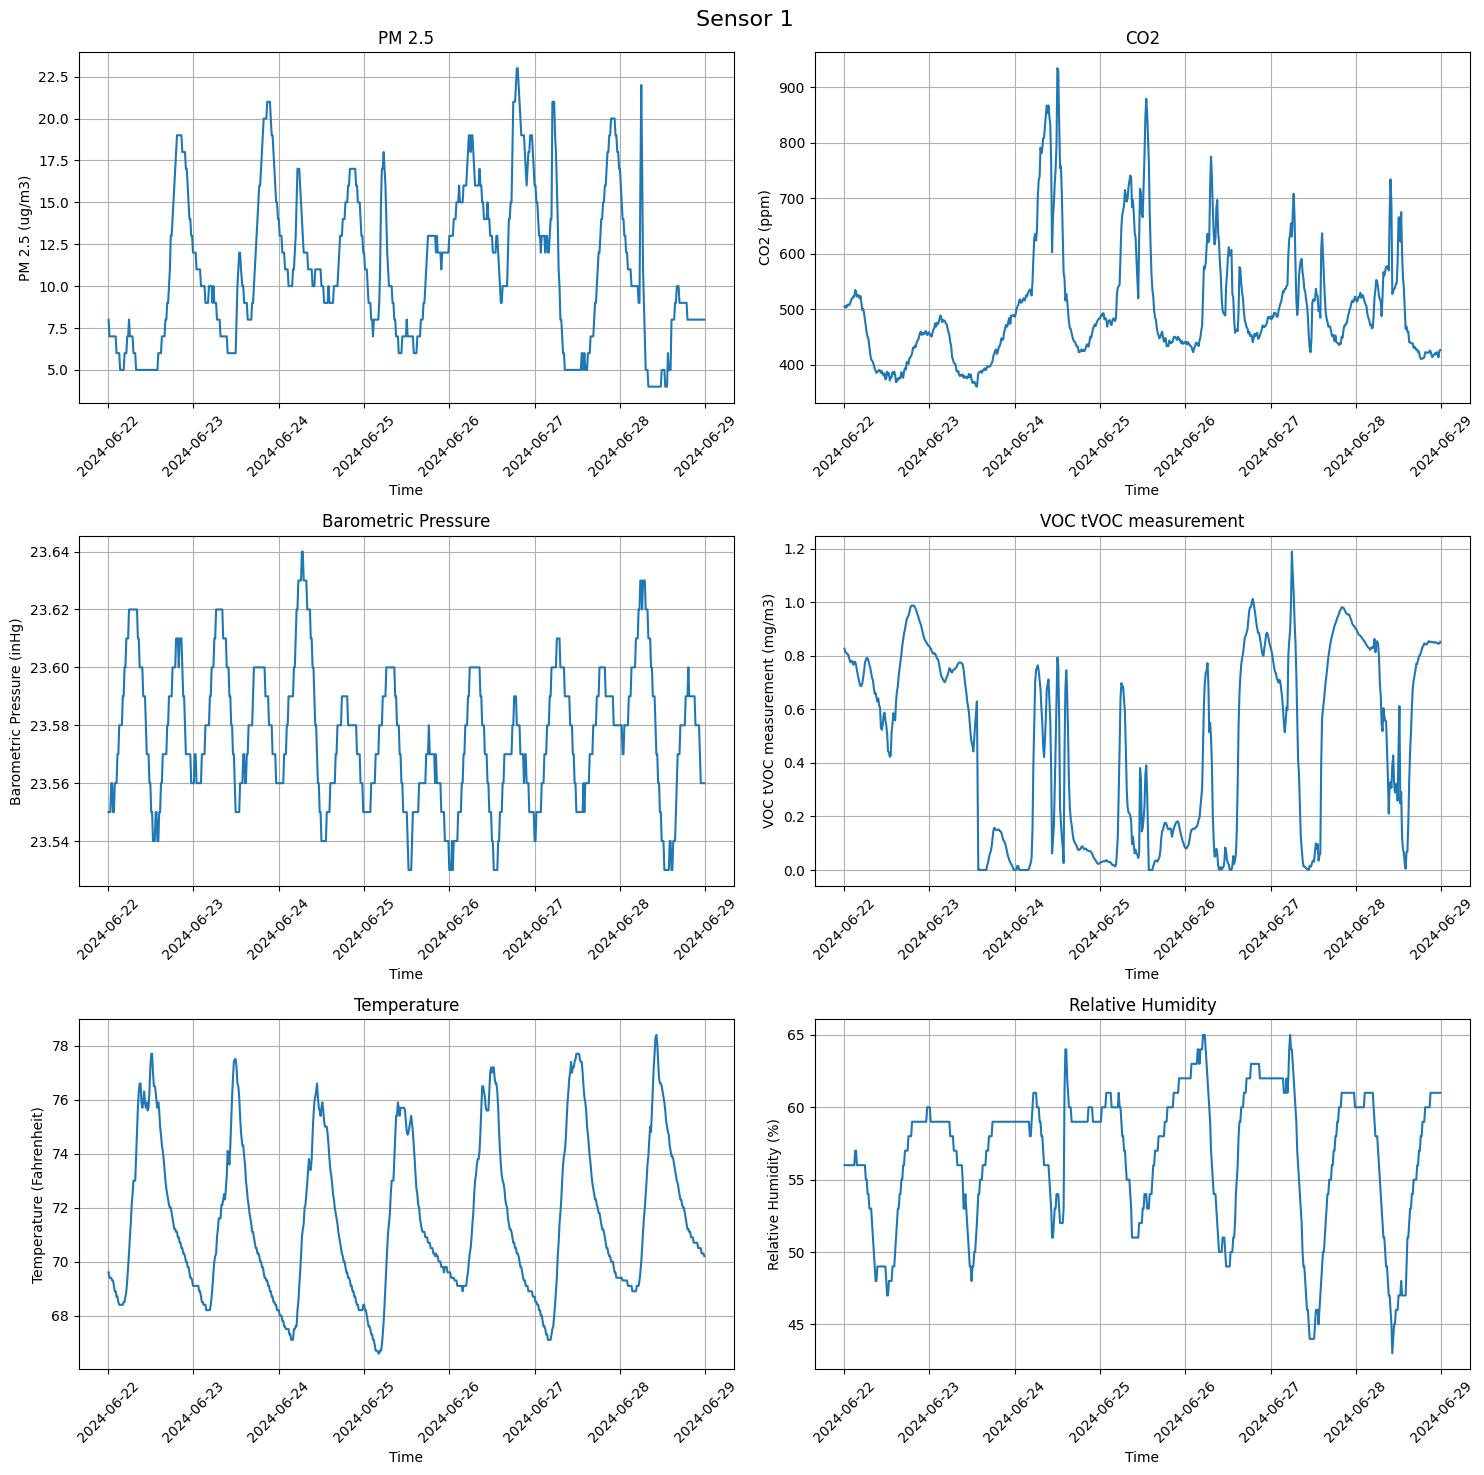

In [17]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']
columns_not_present = list(set(columns_to_plot) - set(sensor_dataframes[0].columns.to_list()))
working_columns = [x for x in columns_to_plot if x not in columns_not_present]

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes[:1]):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### Apply Harmonization

In [18]:
import os

parameters_dir = os.path.join("parameters")

# Apply parameters to each dataframe and each column
for sensor_df in cleaned_sensor_dataframes:
    for column_name in working_columns:
        coefficients_file = os.path.join(parameters_dir, f"{column_name.lower().replace(' ', '_')}_coefficients_df.csv")
        coefficients_df = pd.read_csv(coefficients_file)
        for index, row in coefficients_df.iterrows():
            sensor_df[column_name] = sensor_df[column_name] * row['Coefficient'] + row['Intercept']

### Plot

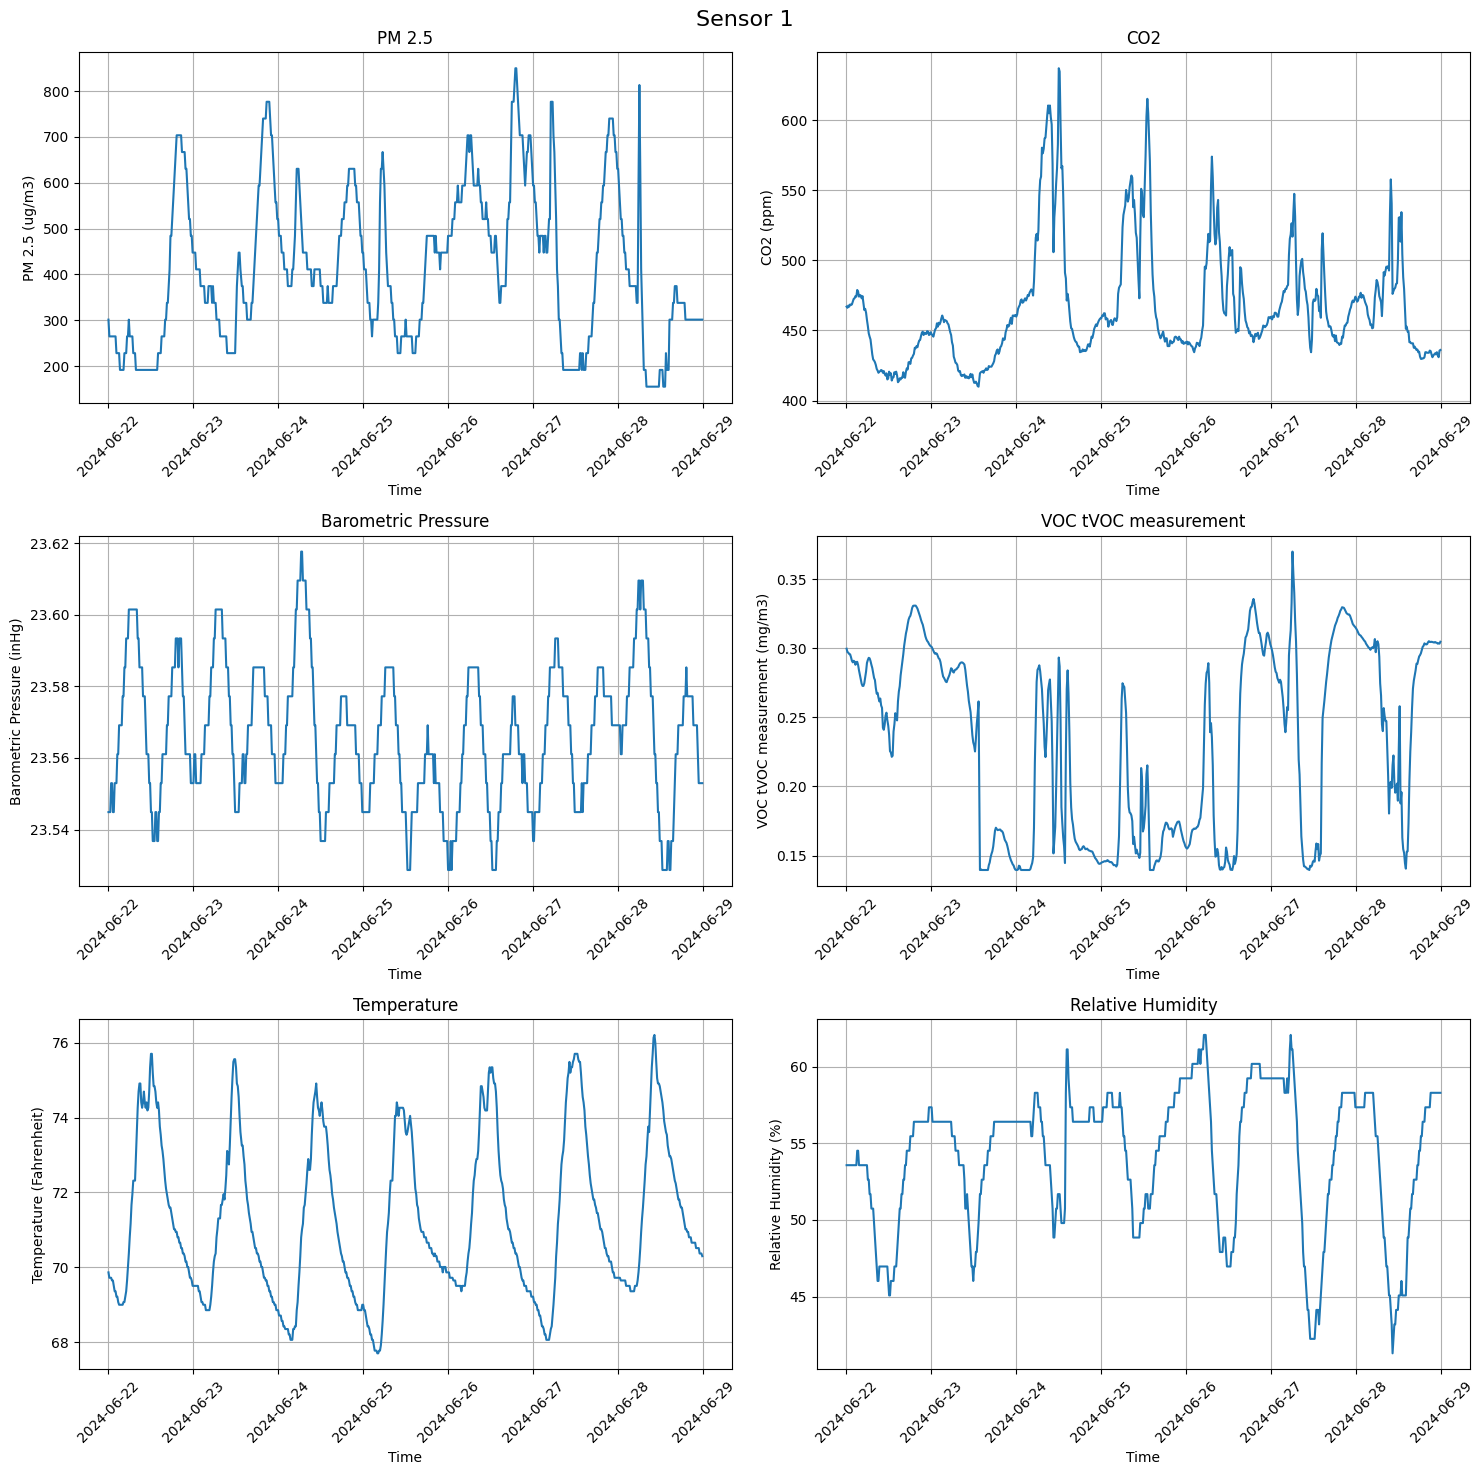

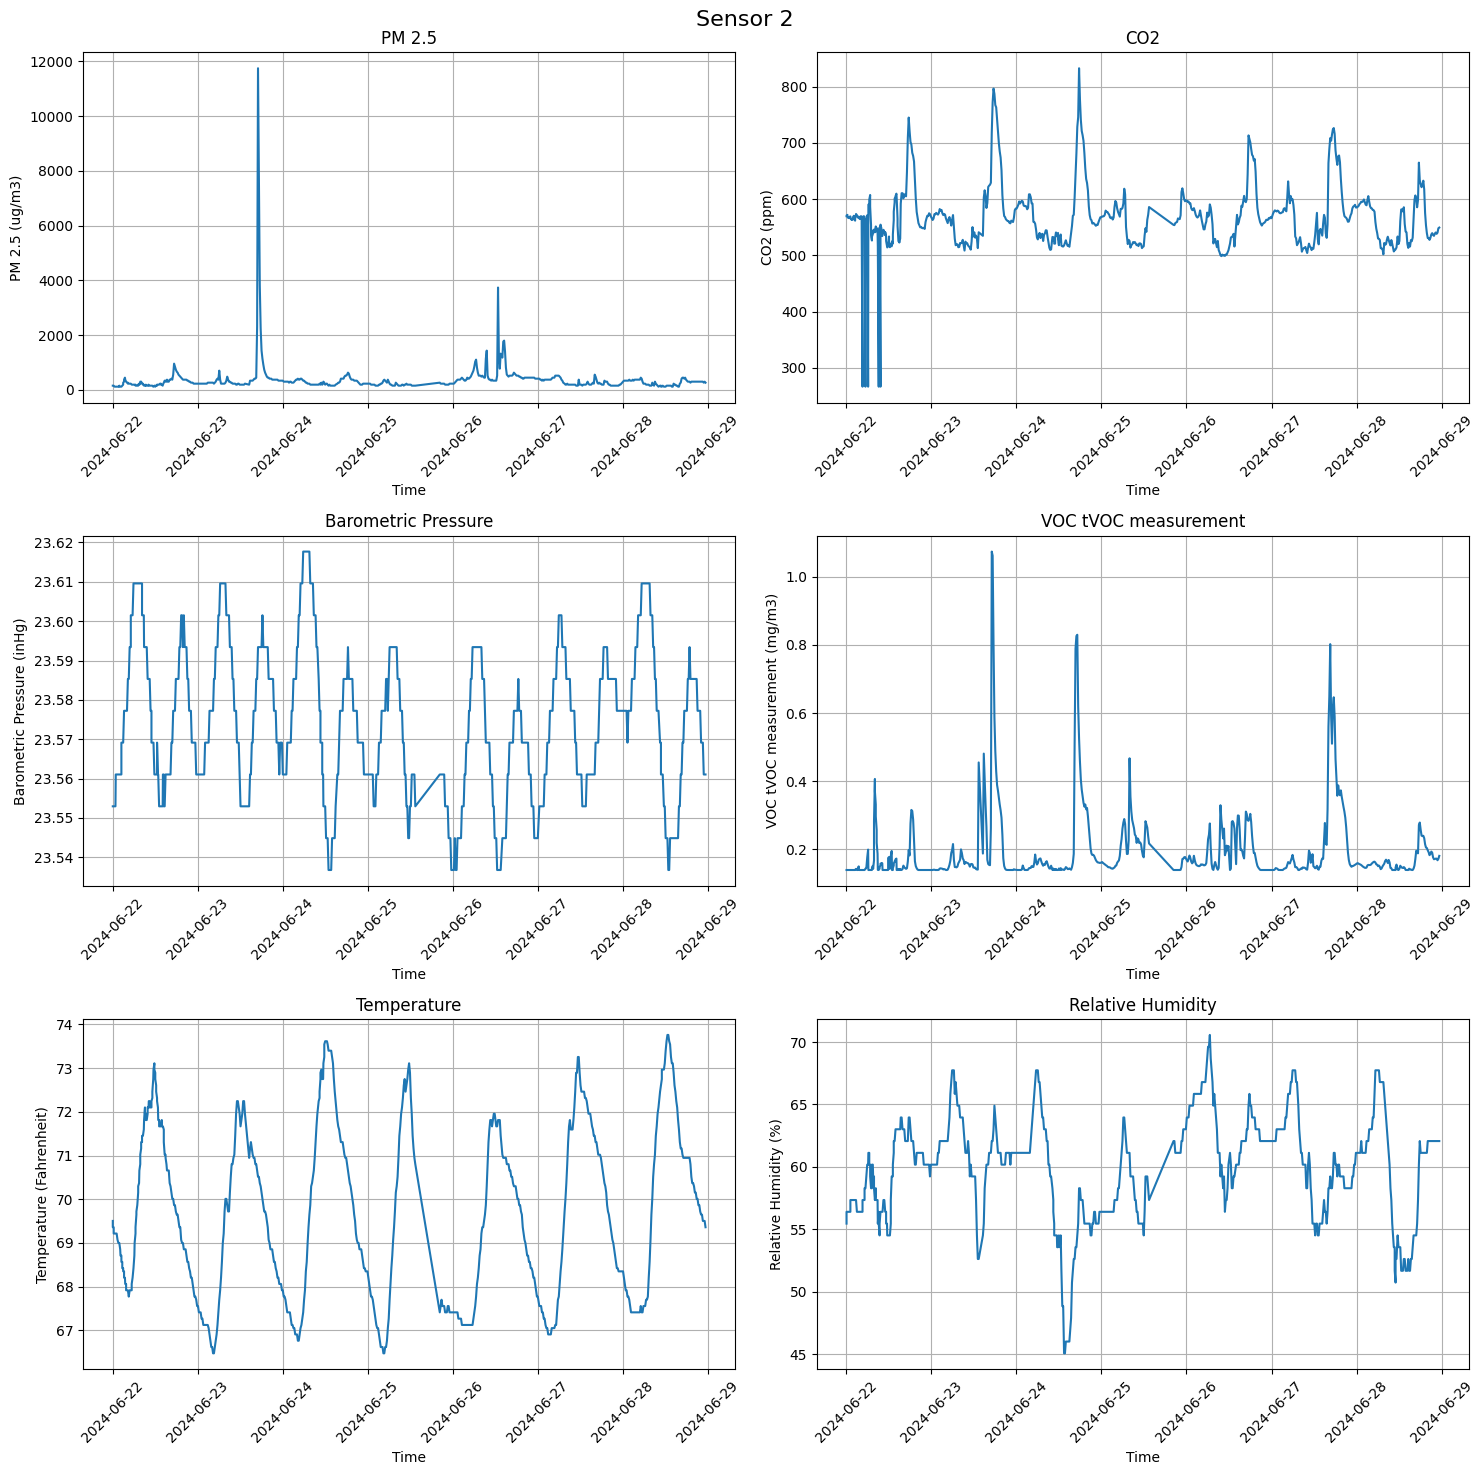

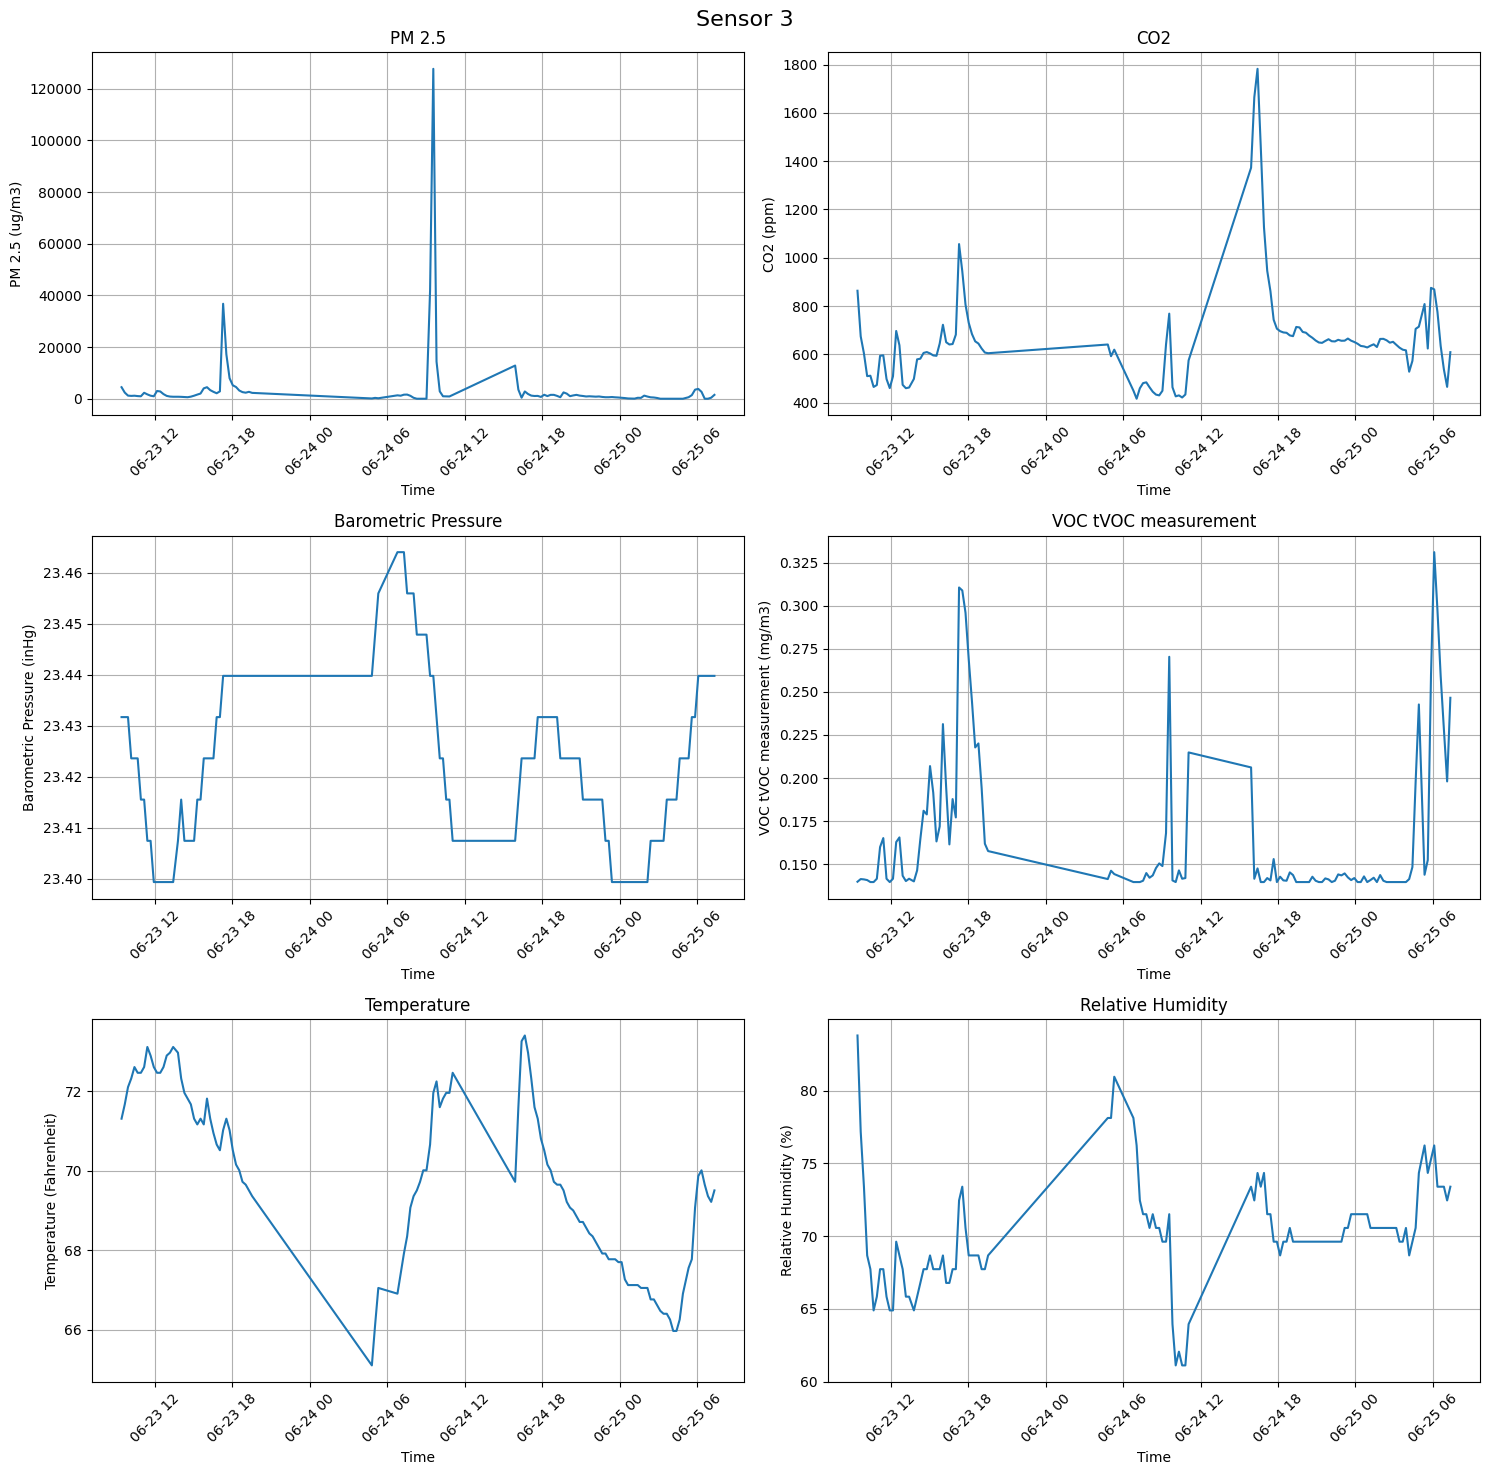

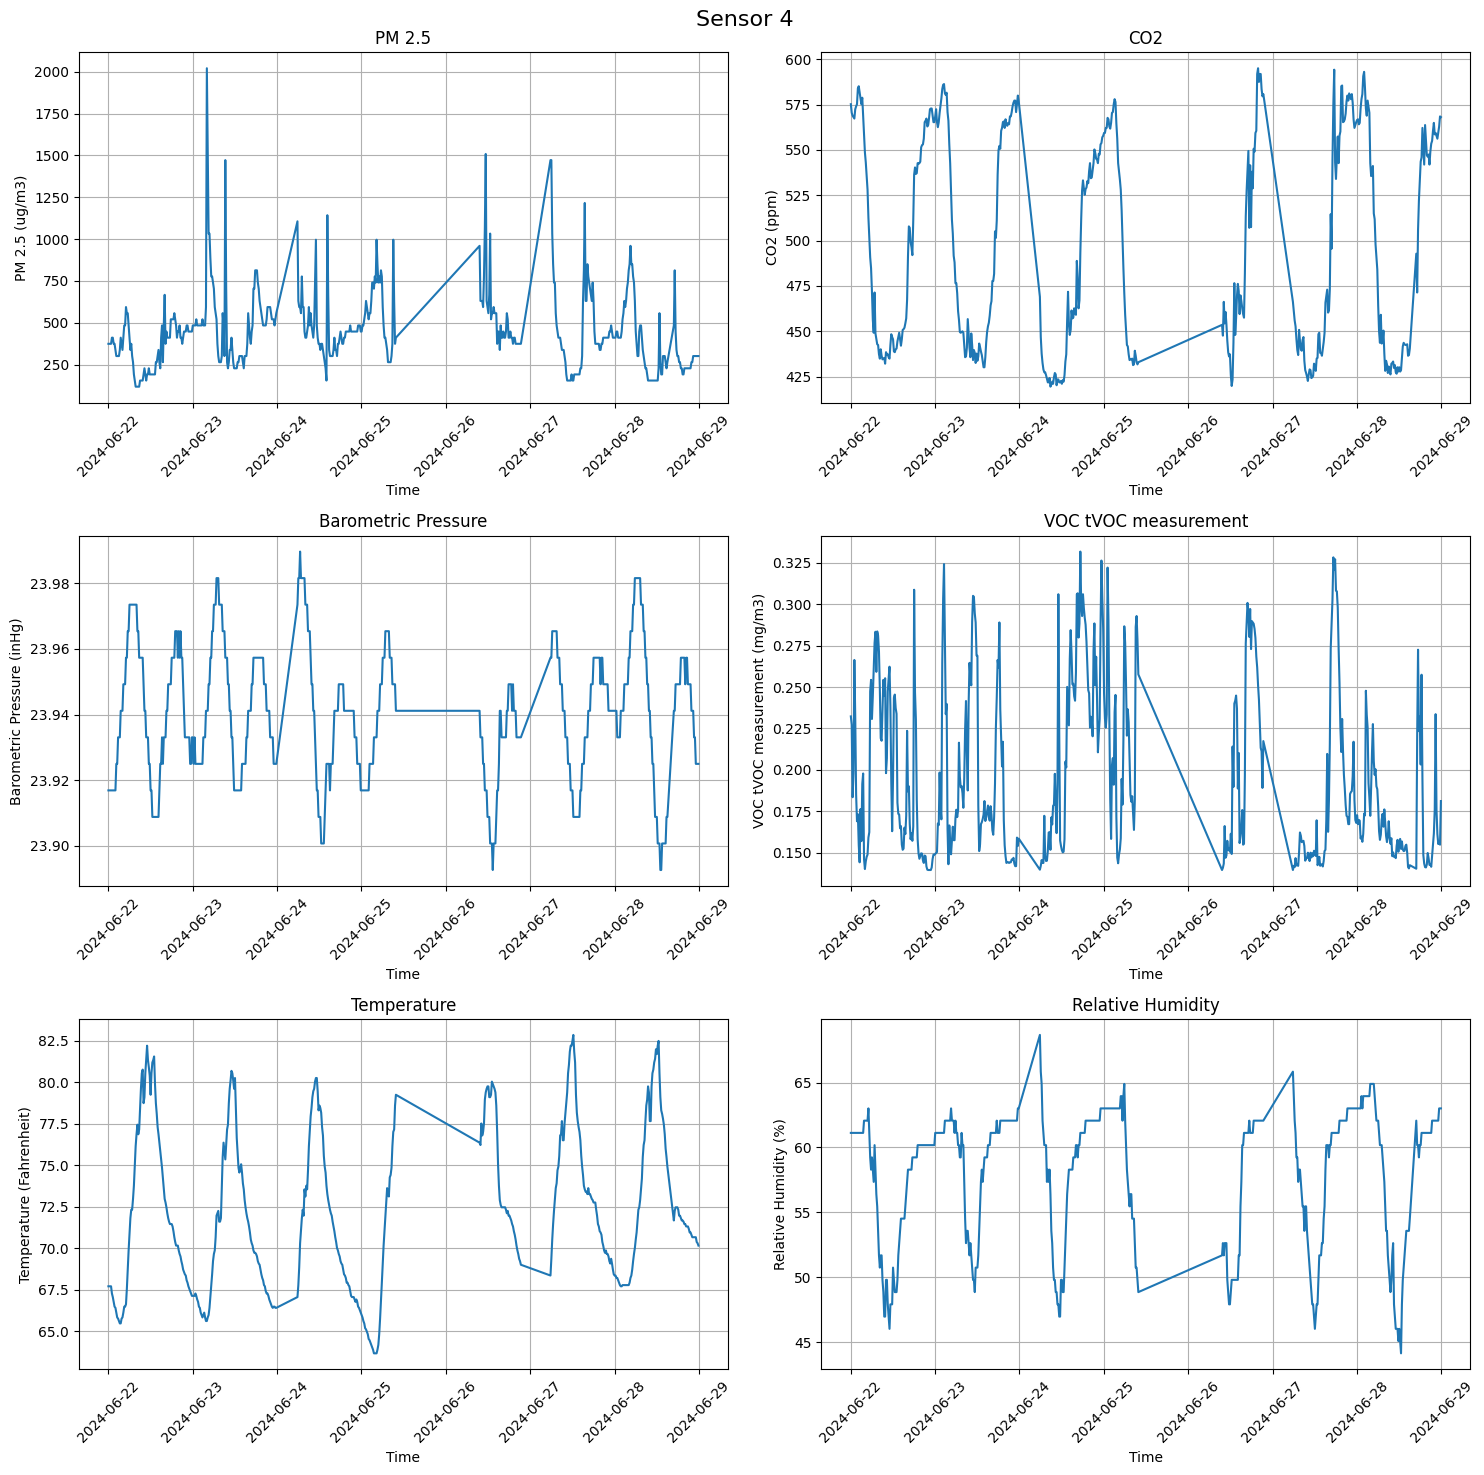

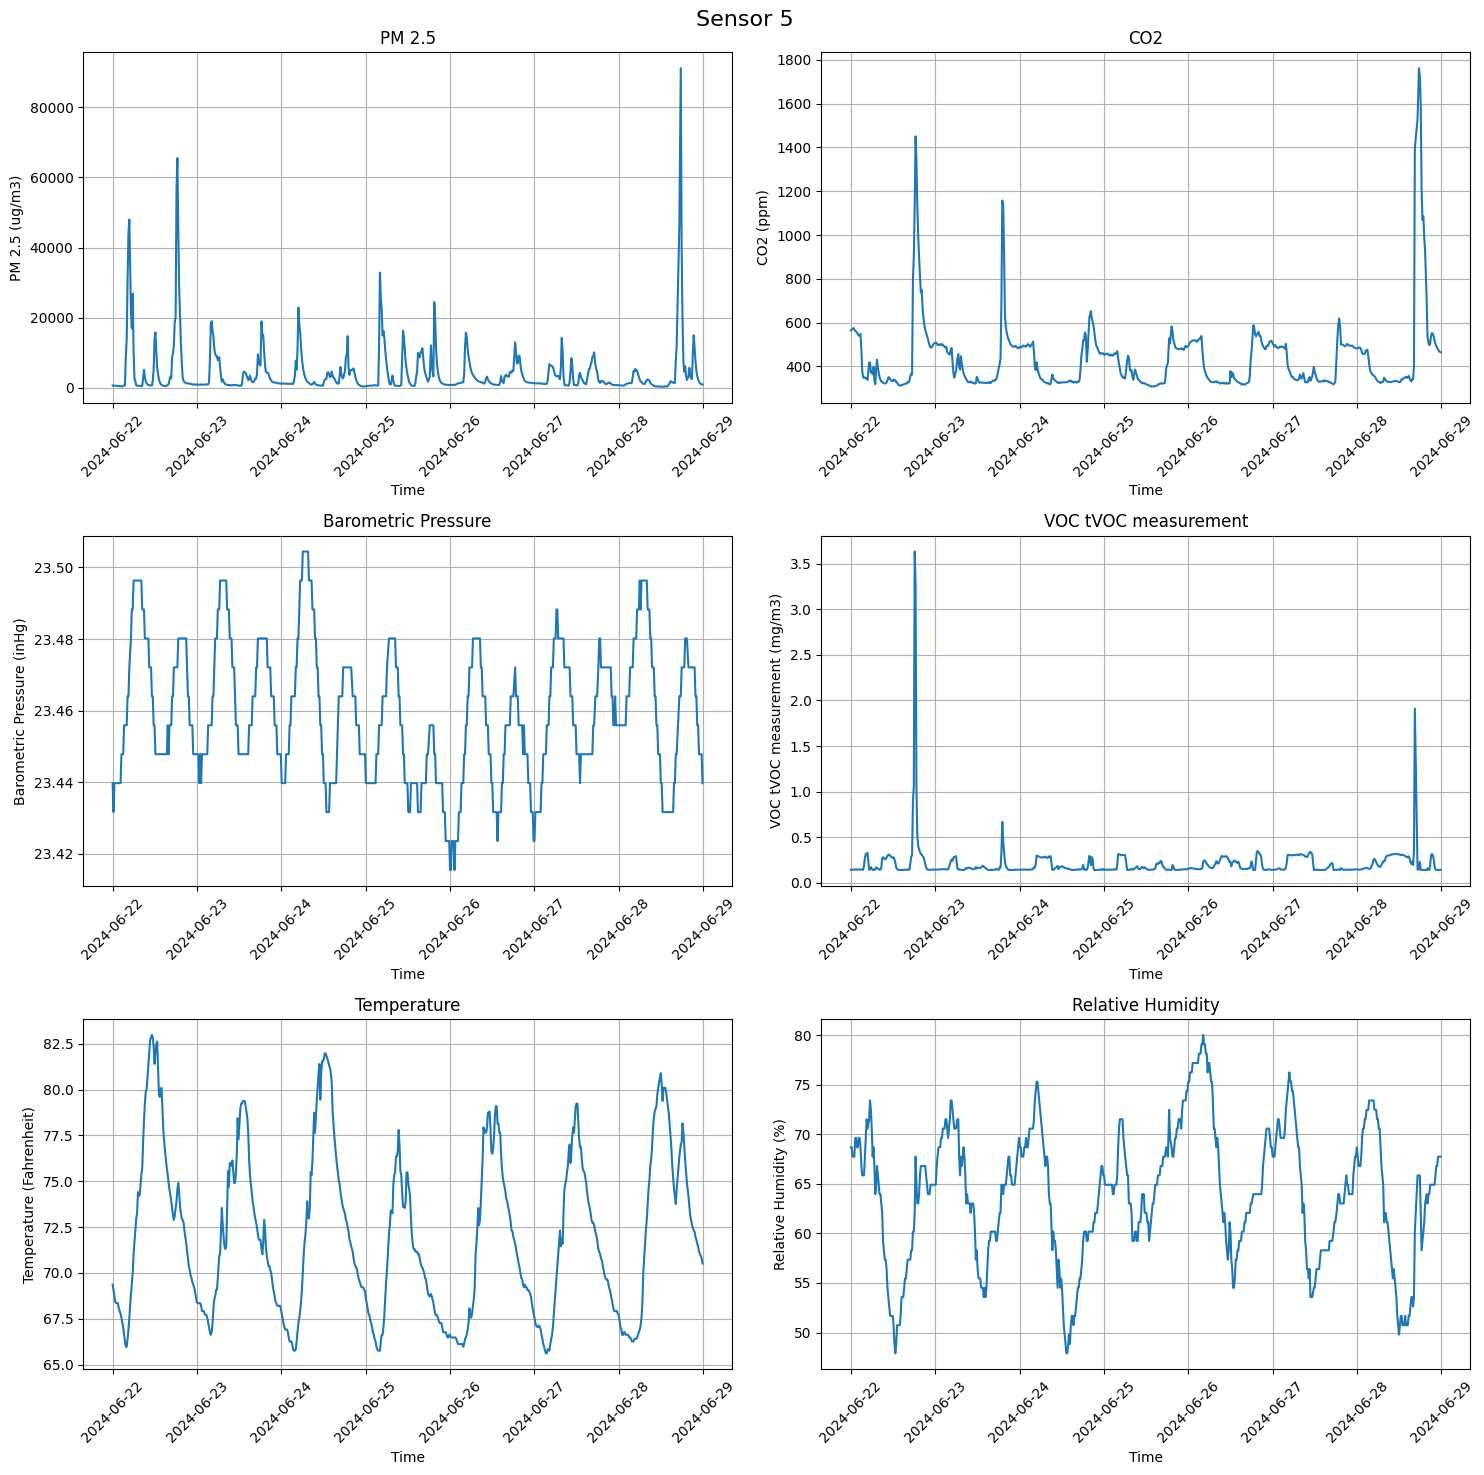

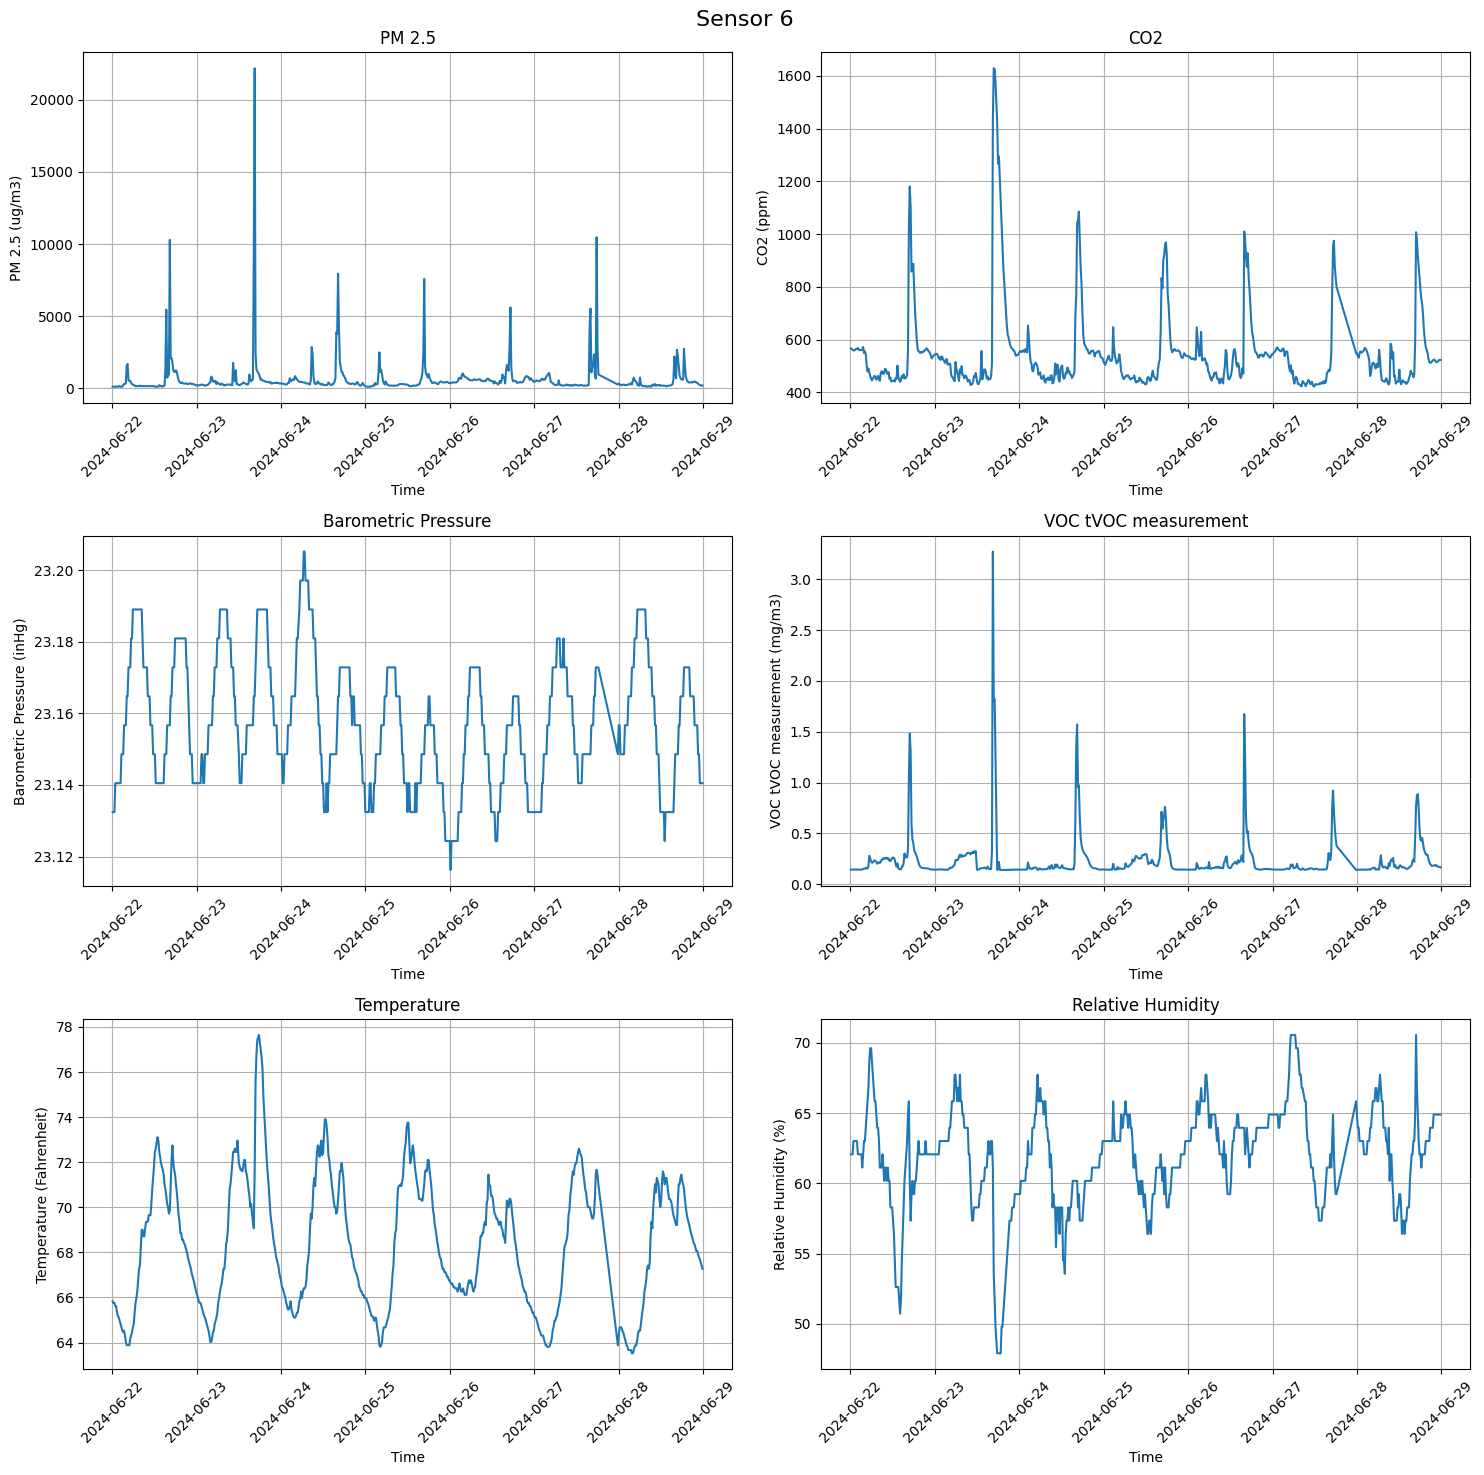

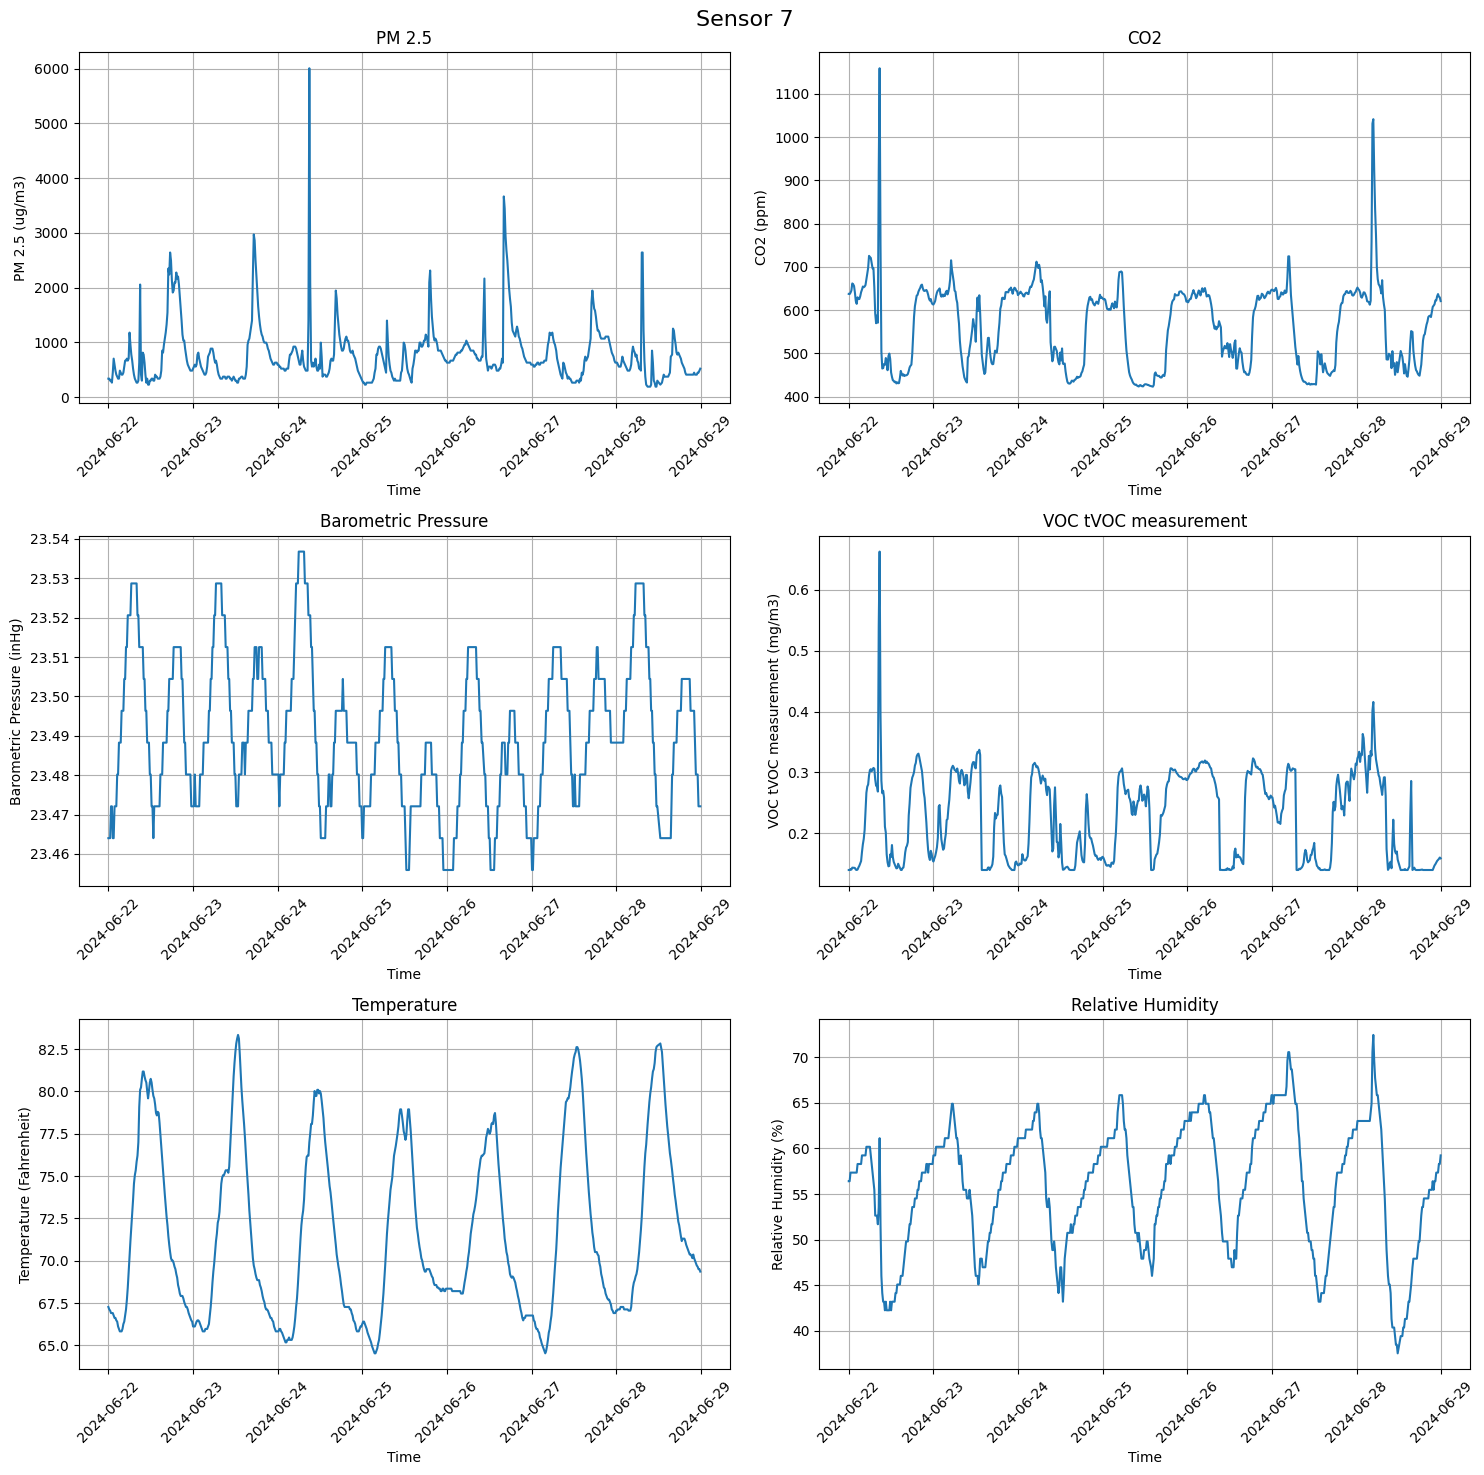

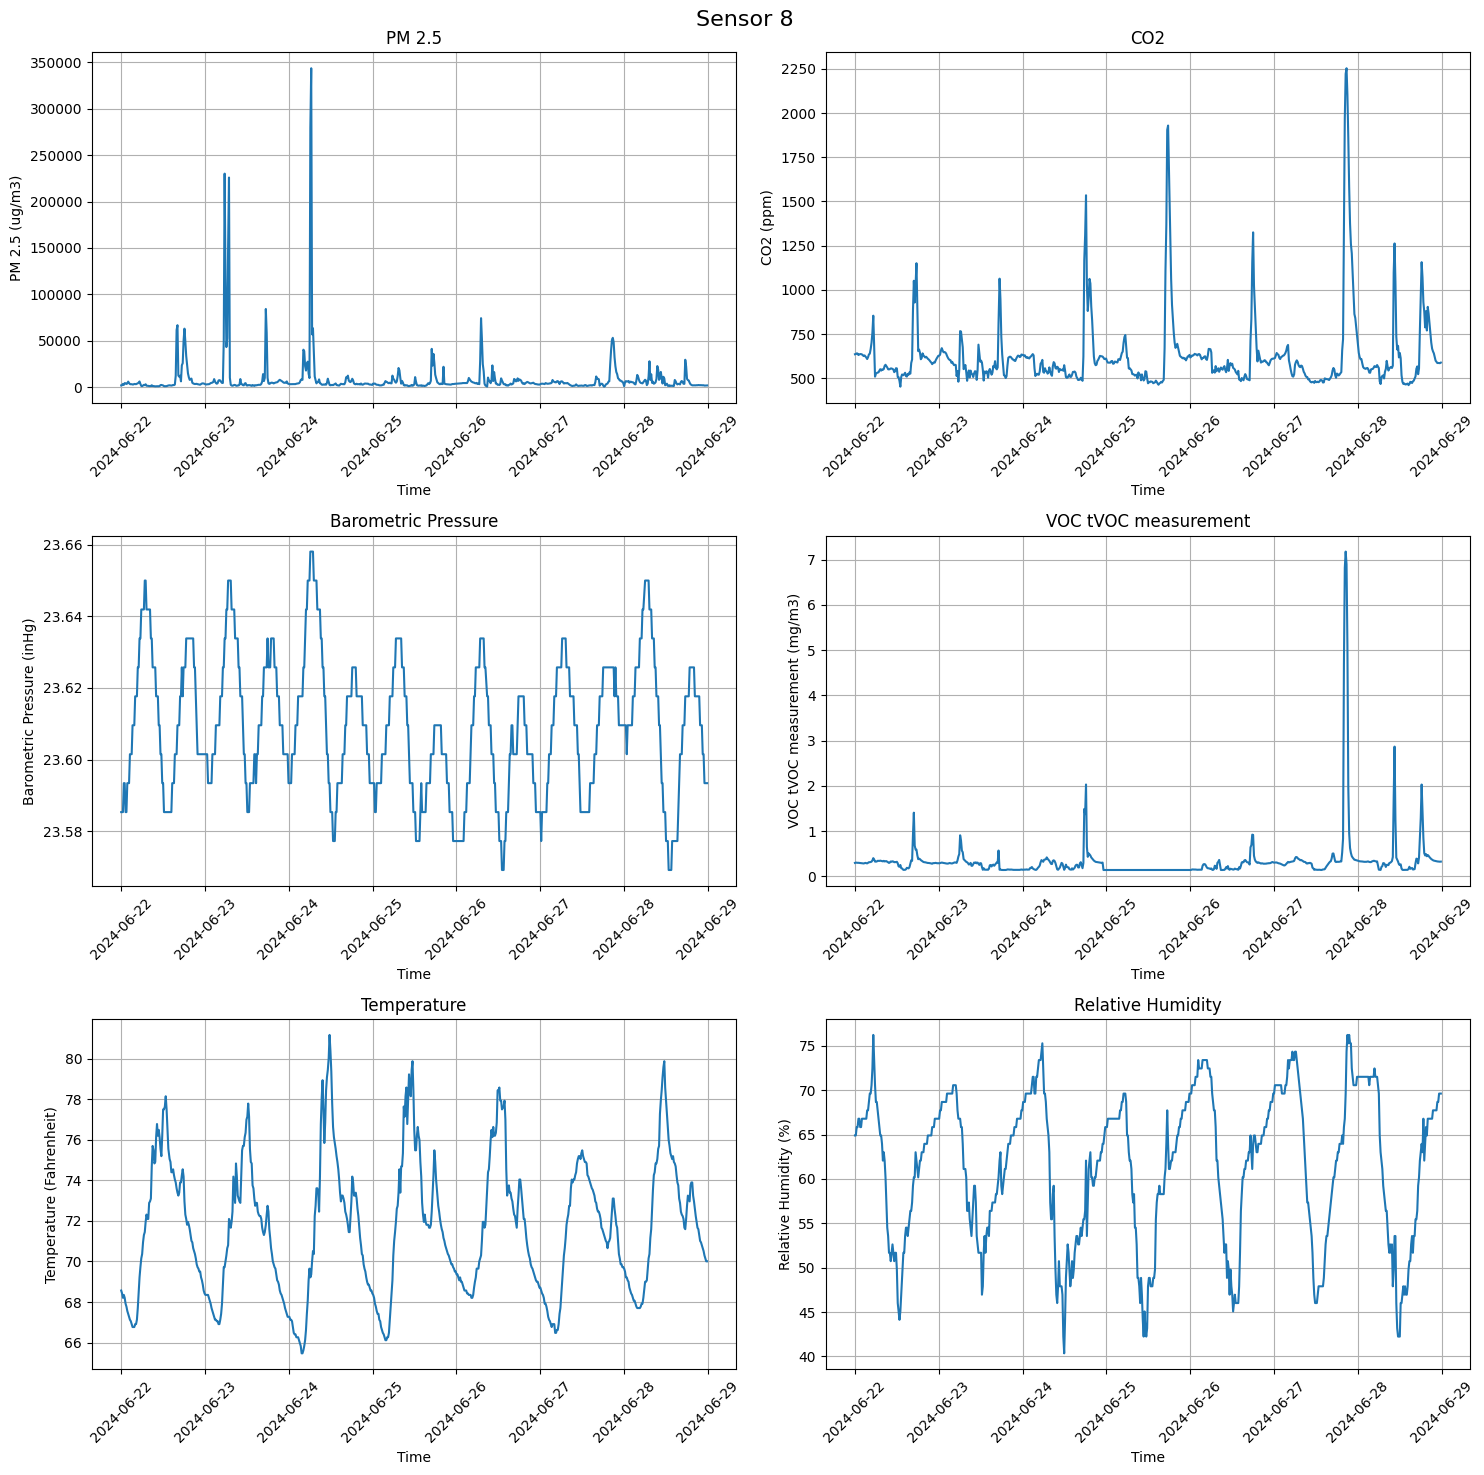

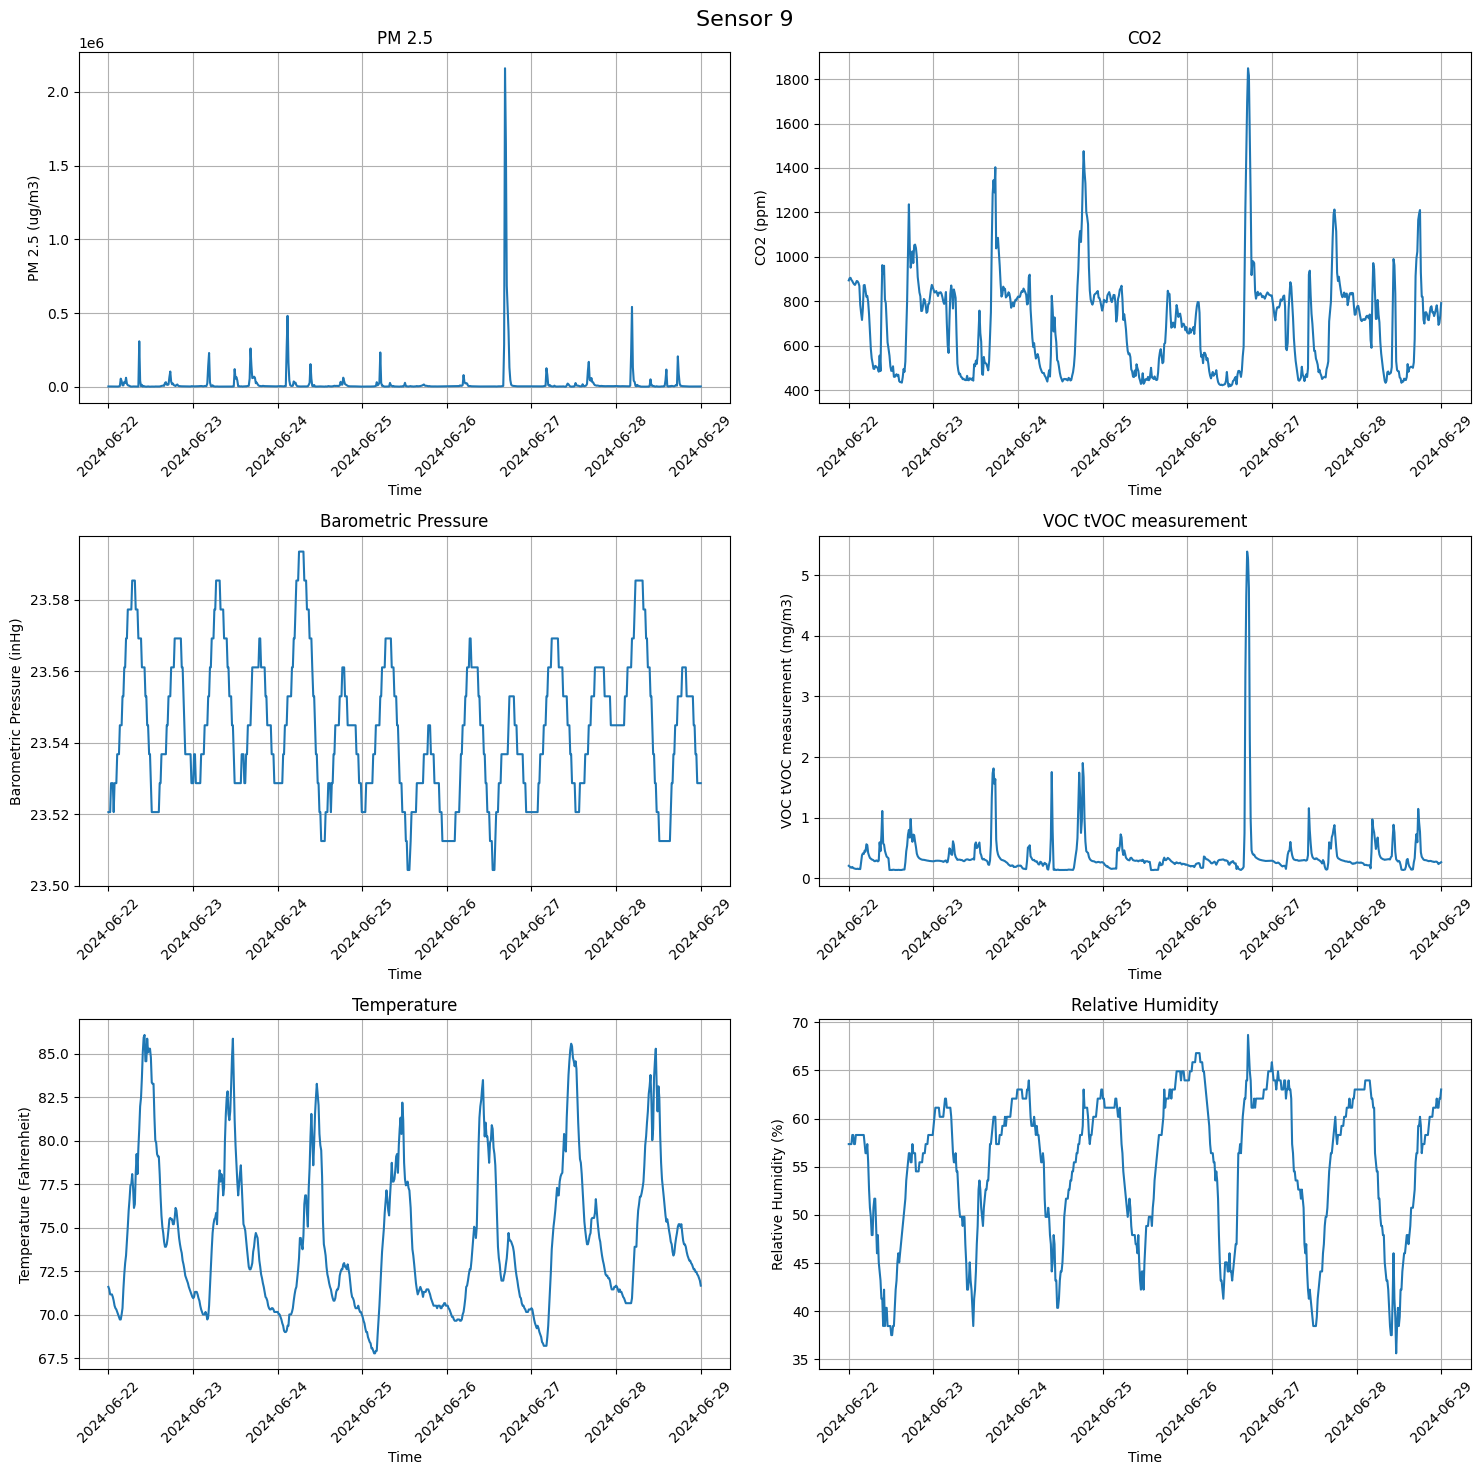

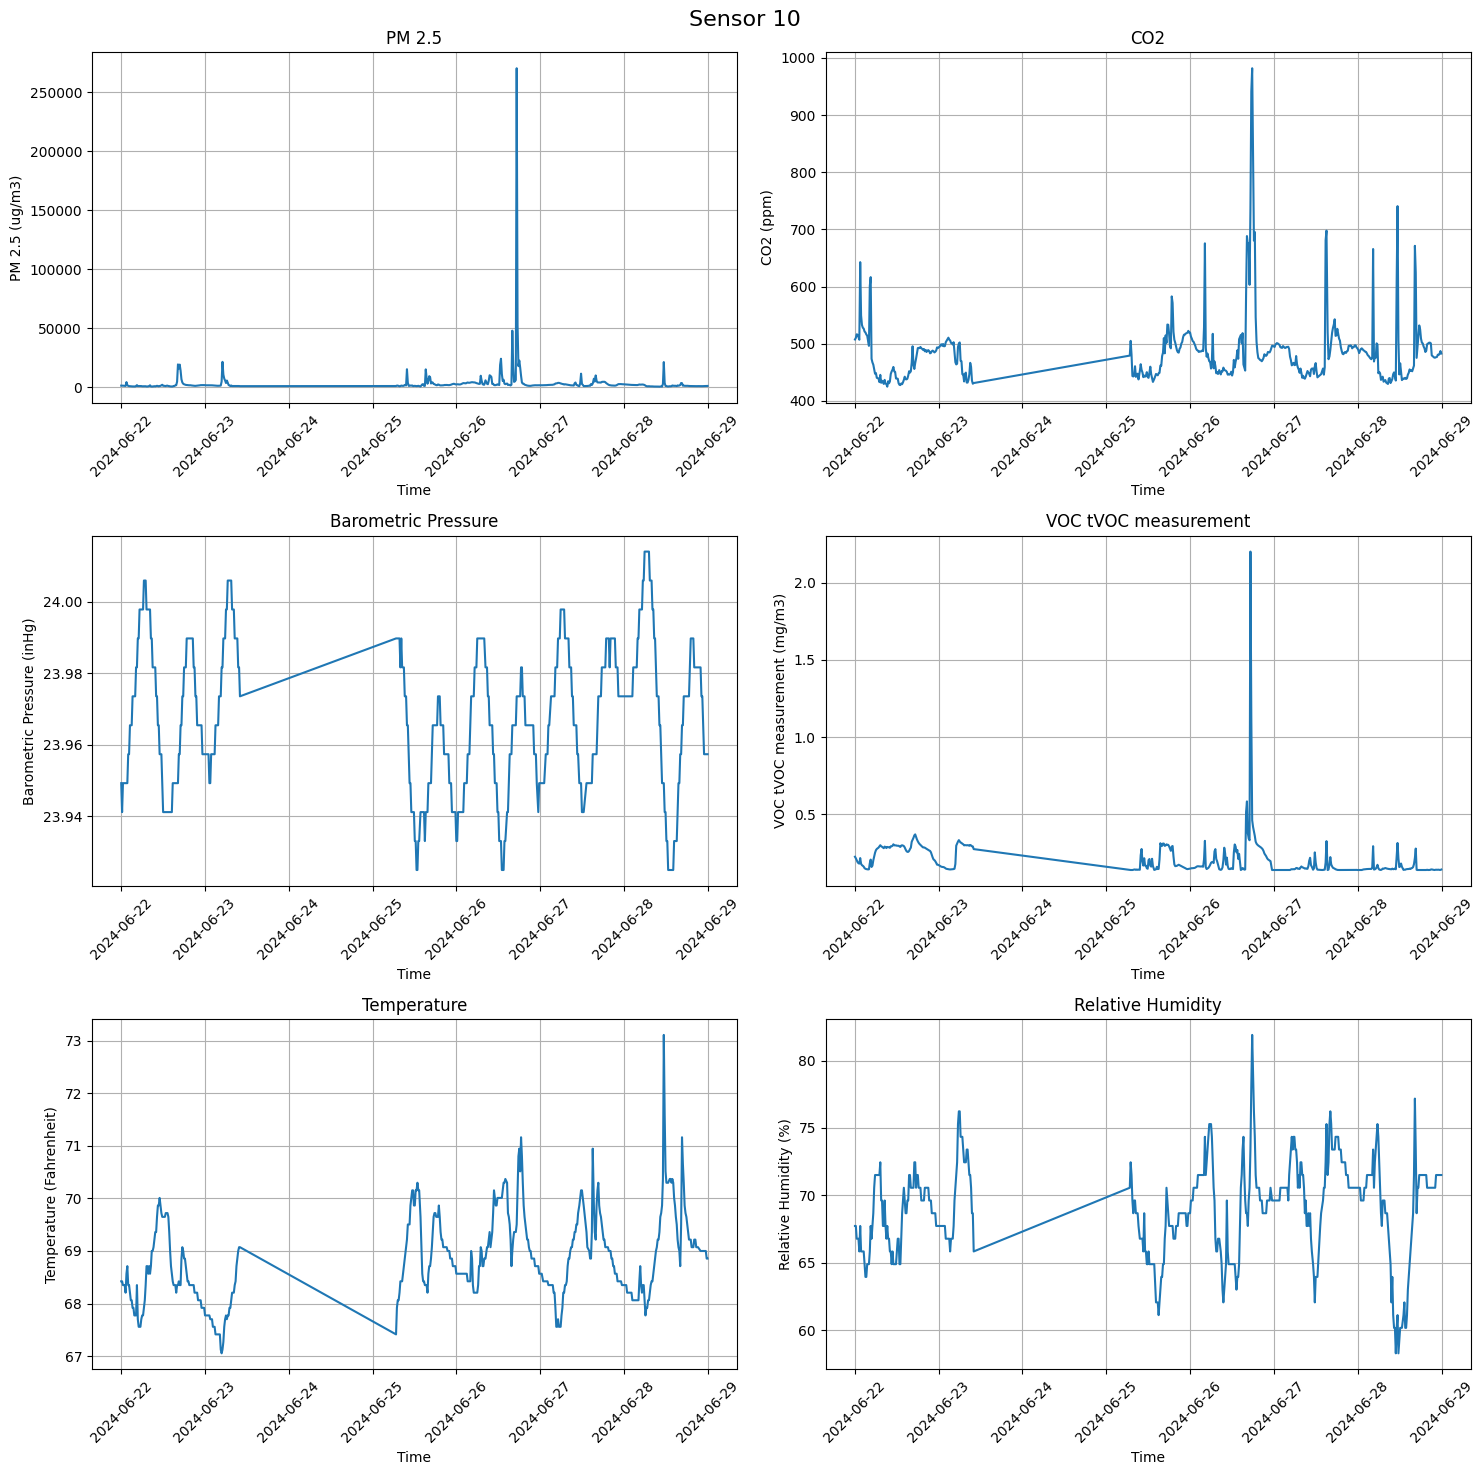

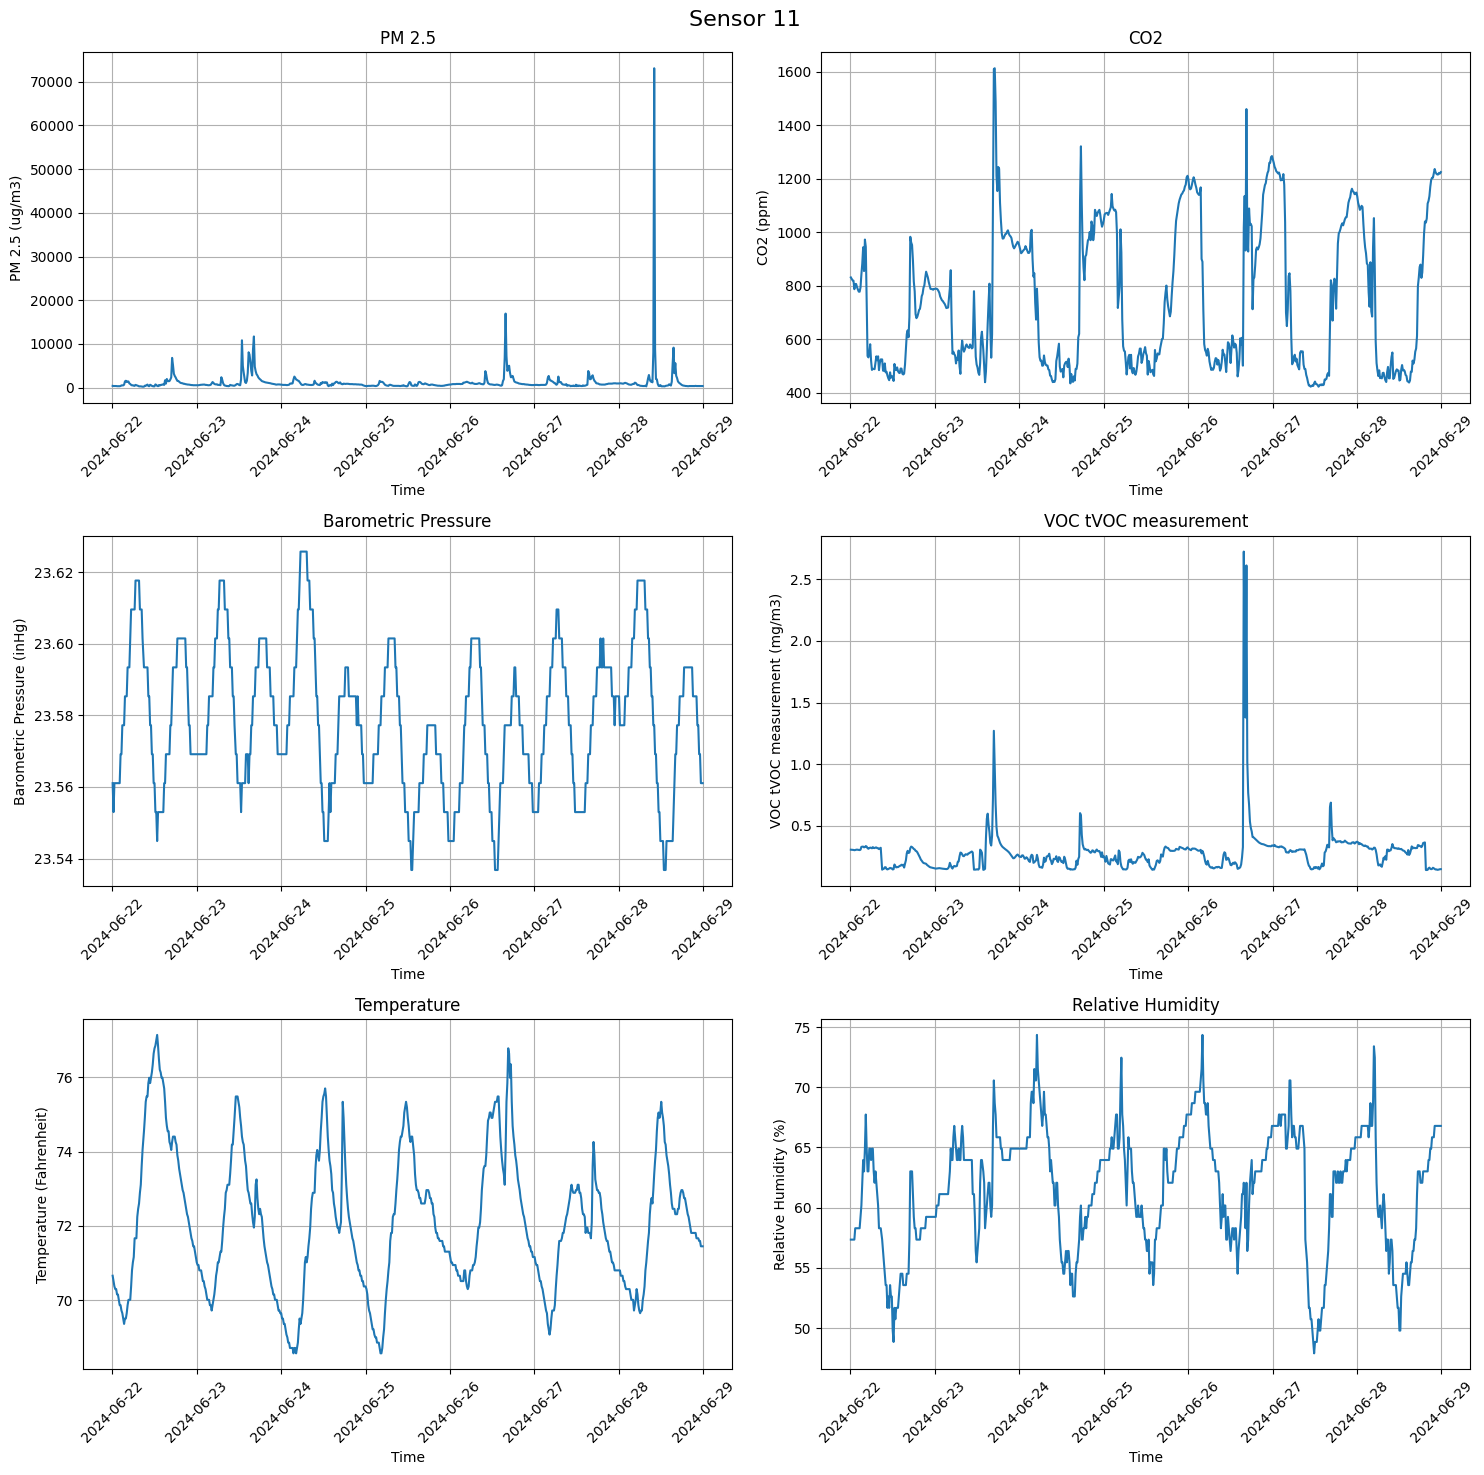

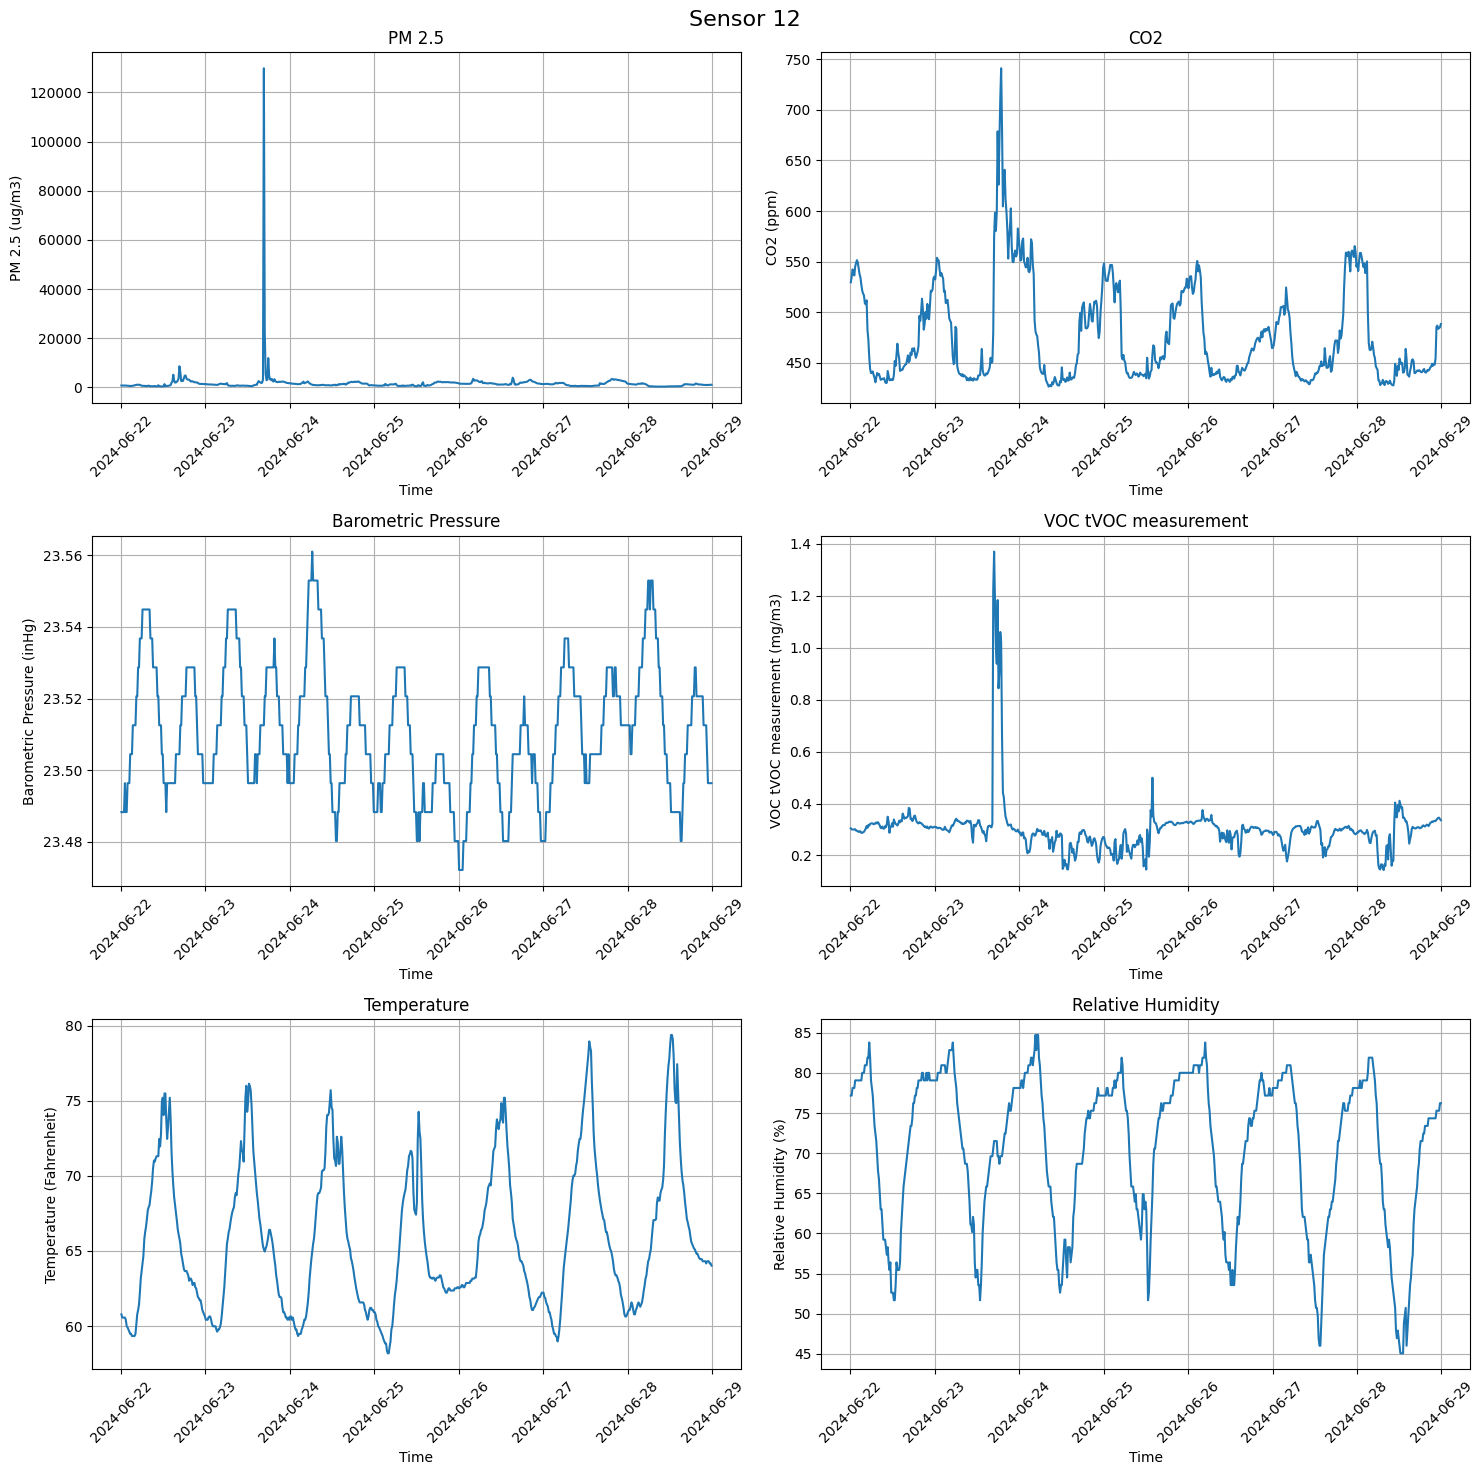

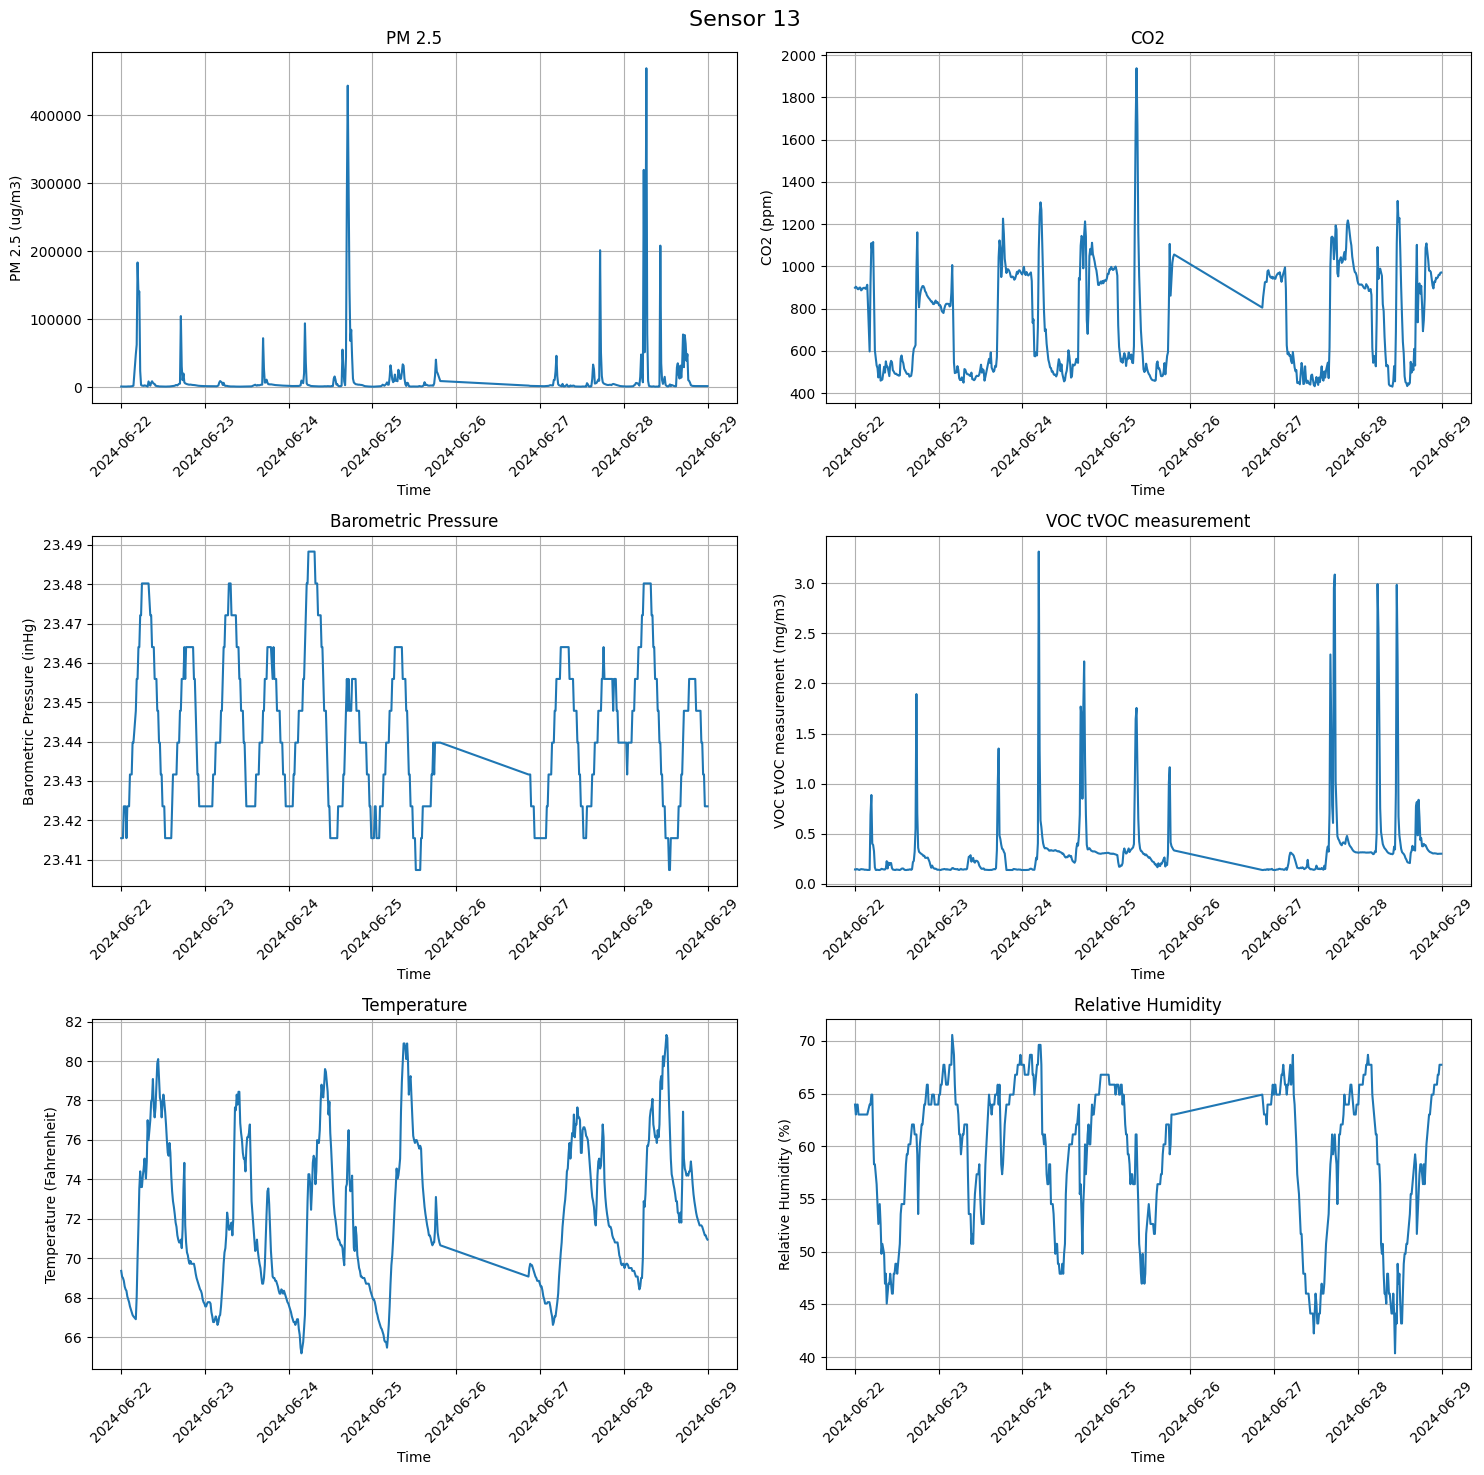

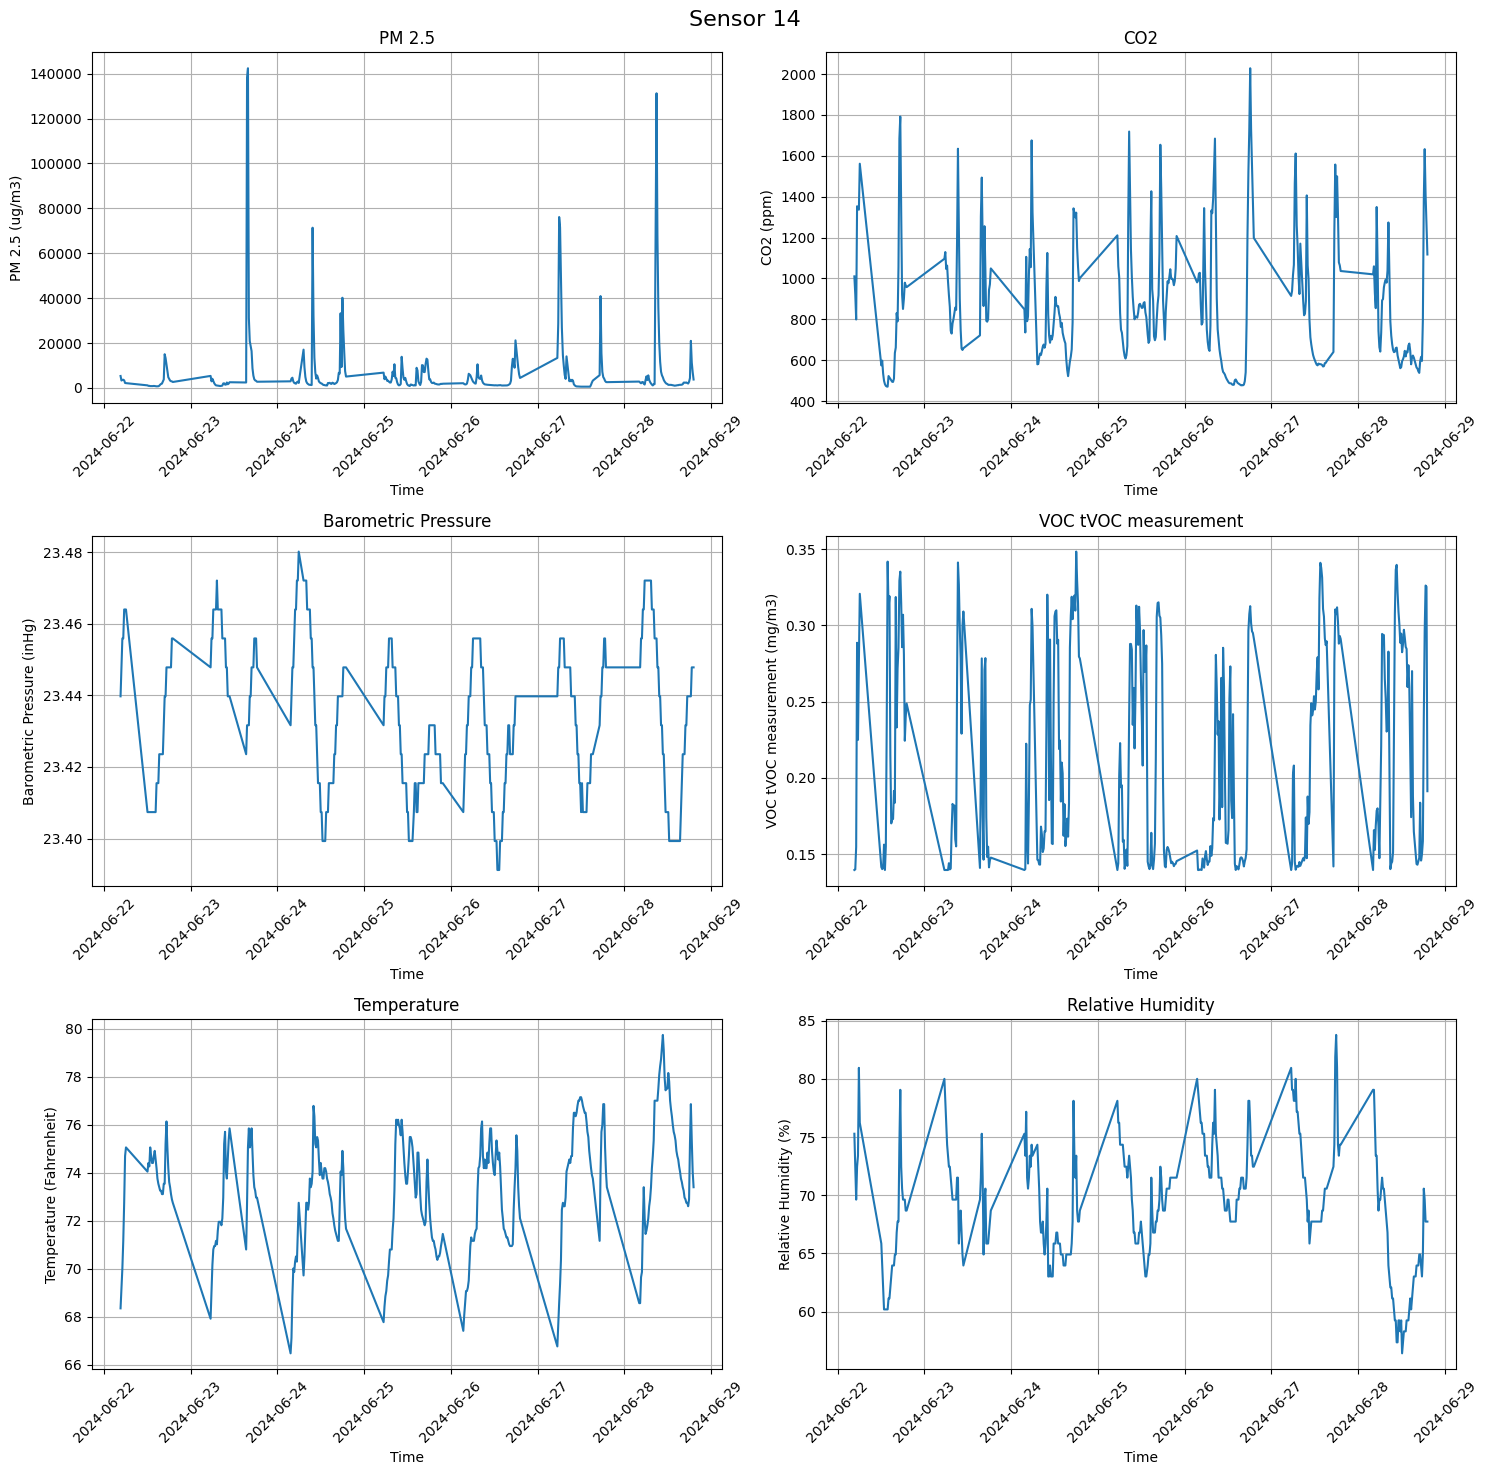

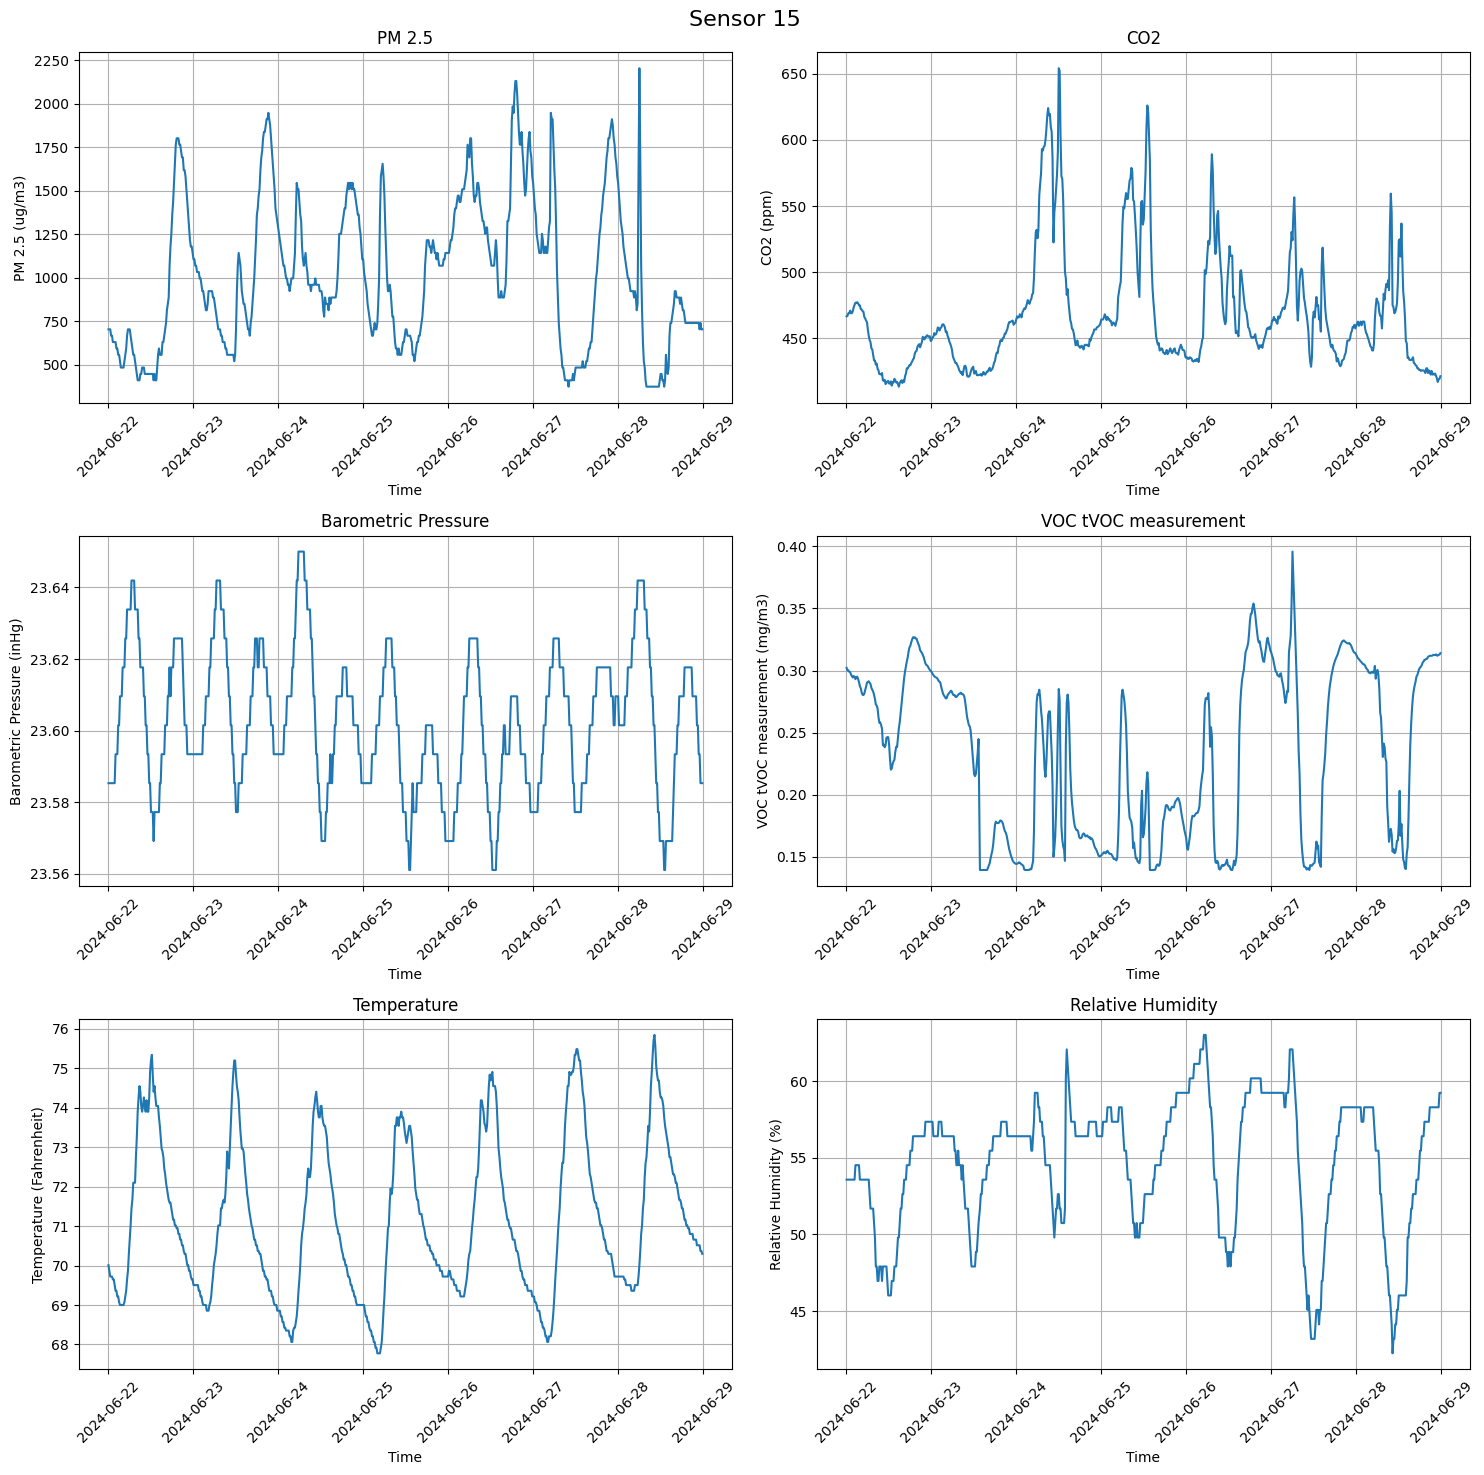

In [20]:
# Define columns to plot
# columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f"Output/Weekly QA-QC/Jun29-Jul5/sensor_{sensor_num + 1}.png")
    plt.show()